In [47]:
from Functions import *
import pyautogui 
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    cm = np.array(cm)
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [48]:
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names)
im=df['pixels']
df.head(10)
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

7
(35887, 48, 48, 1)


In [ ]:
model = my_model()

In [15]:
model.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Epoch 1/3
1010/1010 [==============================] - 597s 591ms/step - loss: 1.1746 - accuracy: 0.5559 - val_loss: 1.1542 - val_accuracy: 0.5612
Epoch 2/3
1010/1010 [==============================] - 629s 623ms/step - loss: 1.0506 - accuracy: 0.6036 - val_loss: 1.0846 - val_accuracy: 0.5982
Epoch 3/3
1010/1010 [==============================] - 662s 655ms/step - loss: 0.9310 - accuracy: 0.6543 - val_loss: 1.0680 - val_accuracy: 0.6091


In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_16 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 128)      

In [17]:
model1 = Sequential()
input_shape = (48,48,1)
model1.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64))
model1.add(Dense(7))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')




In [19]:
model1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1010/1010 [==============================] - 211s 209ms/step - loss: 1.5083 - accuracy: 0.4192 - val_loss: 1.5067 - val_accuracy: 0.4291
Epoch 2/5
1010/1010 [==============================] - 214s 212ms/step - loss: 1.2228 - accuracy: 0.5370 - val_loss: 1.2387 - val_accuracy: 0.5272
Epoch 3/5
1010/1010 [==============================] - 216s 214ms/step - loss: 1.0824 - accuracy: 0.5916 - val_loss: 1.3529 - val_accuracy: 0.4595
Epoch 4/5
1010/1010 [==============================] - 223s 220ms/step - loss: 0.9514 - accuracy: 0.6464 - val_loss: 1.1582 - val_accuracy: 0.5684
Epoch 5/5
1010/1010 [==============================] - 226s 224ms/step - loss: 0.7965 - accuracy: 0.7053 - val_loss: 1.2626 - val_accuracy: 0.5439


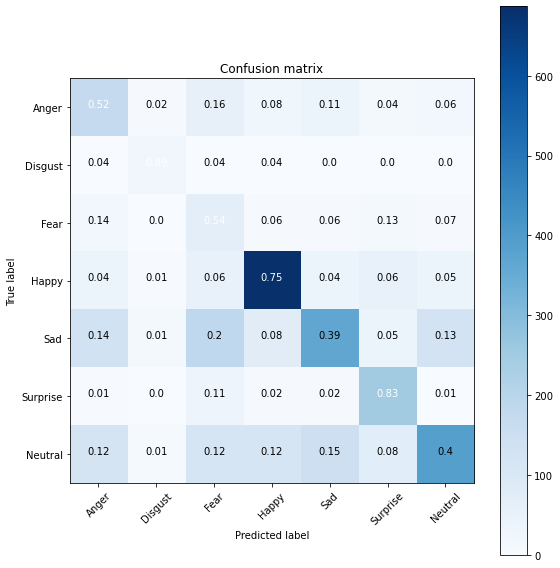

In [49]:
y_pred=model1.predict(X_test)
y_test.shape

ly_pred = []
for i in y_pred:
    ly_pred.append(i.argmax())
ly_test = []
for i in y_test:
    ly_test.append(i.argmax())
    
cm = tf.math.confusion_matrix(ly_pred,ly_test)

cm=plot_confusion_matrix(cm,label_map)

In [30]:
model2 = Sequential()
input_shape = (48,48,1)
model2.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))



model2.add(Flatten())
model2.add(Dense(256))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(7))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [31]:
model2.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1010/1010 [==============================] - 87s 86ms/step - loss: 1.6966 - accuracy: 0.3168 - val_loss: 1.5133 - val_accuracy: 0.4135
Epoch 2/5
1010/1010 [==============================] - 84s 83ms/step - loss: 1.4767 - accuracy: 0.4271 - val_loss: 1.3926 - val_accuracy: 0.4648
Epoch 3/5
1010/1010 [==============================] - 84s 83ms/step - loss: 1.3801 - accuracy: 0.4695 - val_loss: 1.3132 - val_accuracy: 0.4954
Epoch 4/5
1010/1010 [==============================] - 85s 84ms/step - loss: 1.3005 - accuracy: 0.5040 - val_loss: 1.2628 - val_accuracy: 0.5180
Epoch 5/5
1010/1010 [==============================] - 84s 83ms/step - loss: 1.2296 - accuracy: 0.5319 - val_loss: 1.2397 - val_accuracy: 0.5205


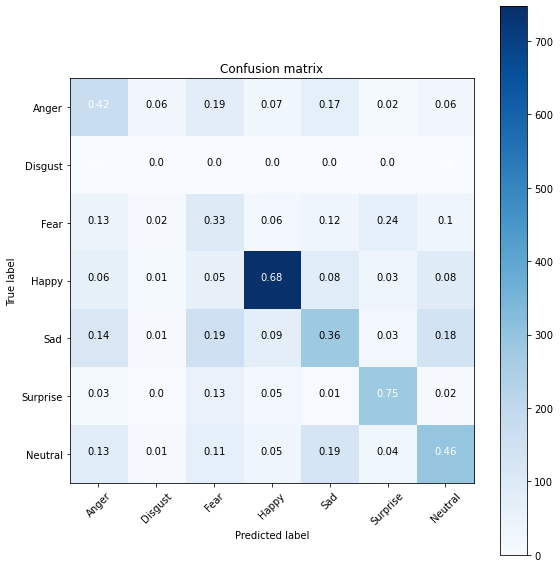

In [50]:
y_pred=model2.predict(X_test)
y_test.shape

ly_pred = []
for i in y_pred:
    ly_pred.append(i.argmax())
ly_test = []
for i in y_test:
    ly_test.append(i.argmax())
    
cm = tf.math.confusion_matrix(ly_pred,ly_test)
cm=plot_confusion_matrix(cm,label_map)

In [33]:
model3 = Sequential()
input_shape = (48,48,1)
model3.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(256, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))



model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dense(7))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [34]:
model3.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))



Epoch 1/5
1010/1010 [==============================] - 153s 152ms/step - loss: 1.7743 - accuracy: 0.2698 - val_loss: 1.6328 - val_accuracy: 0.3469
Epoch 2/5
1010/1010 [==============================] - 153s 152ms/step - loss: 1.5632 - accuracy: 0.3742 - val_loss: 1.5207 - val_accuracy: 0.3940
Epoch 3/5
1010/1010 [==============================] - 152s 151ms/step - loss: 1.4404 - accuracy: 0.4310 - val_loss: 1.3703 - val_accuracy: 0.4622
Epoch 4/5
1010/1010 [==============================] - 160s 159ms/step - loss: 1.3458 - accuracy: 0.4775 - val_loss: 1.3227 - val_accuracy: 0.4896
Epoch 5/5
1010/1010 [==============================] - 150s 149ms/step - loss: 1.2700 - accuracy: 0.5089 - val_loss: 1.2927 - val_accuracy: 0.5038


<ipython-input-47-cbaf1bd15943>:23: RuntimeWarning: invalid value encountered in true_divide
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)


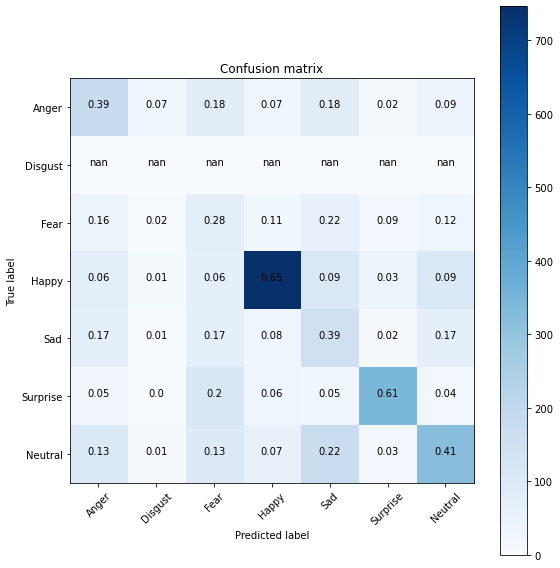

In [51]:
y_pred=model3.predict(X_test)
y_test.shape

ly_pred = []
for i in y_pred:
    ly_pred.append(i.argmax())
ly_test = []
for i in y_test:
    ly_test.append(i.argmax())
    
cm = tf.math.confusion_matrix(ly_pred,ly_test)
cm = plot_confusion_matrix(cm,label_map)

In [36]:
model4 = Sequential()
input_shape = (48,48,1)
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model4.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64))
model4.add(Activation('relu'))
model4.add(Dense(7))
model4.add(Activation('softmax'))

model4.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [37]:
model4.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))


Epoch 1/5
1010/1010 [==============================] - 921s 912ms/step - loss: 1.7322 - accuracy: 0.3026 - val_loss: 1.6003 - val_accuracy: 0.3770
Epoch 2/5
1010/1010 [==============================] - 876s 867ms/step - loss: 1.4884 - accuracy: 0.4233 - val_loss: 1.3659 - val_accuracy: 0.4815
Epoch 3/5
1010/1010 [==============================] - 1045s 1s/step - loss: 1.3160 - accuracy: 0.5004 - val_loss: 1.2661 - val_accuracy: 0.5116
Epoch 4/5
1010/1010 [==============================] - 920s 911ms/step - loss: 1.1832 - accuracy: 0.5543 - val_loss: 1.2095 - val_accuracy: 0.5294
Epoch 5/5
1010/1010 [==============================] - 884s 876ms/step - loss: 1.0512 - accuracy: 0.6087 - val_loss: 1.1641 - val_accuracy: 0.5609


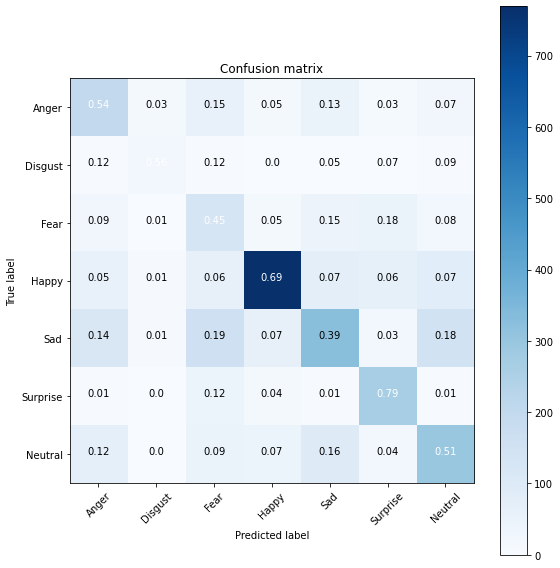

In [52]:
y_pred=model4.predict(X_test)
y_test.shape

ly_pred = []
for i in y_pred:
    ly_pred.append(i.argmax())
ly_test = []
for i in y_test:
    ly_test.append(i.argmax())
    
cm = tf.math.confusion_matrix(ly_pred,ly_test)
cm =plot_confusion_matrix(cm,label_map)

In [39]:
import keract
activations=keract.get_activations(model4,X[3:4])

conv2d_44_input (1, 48, 48, 1) 


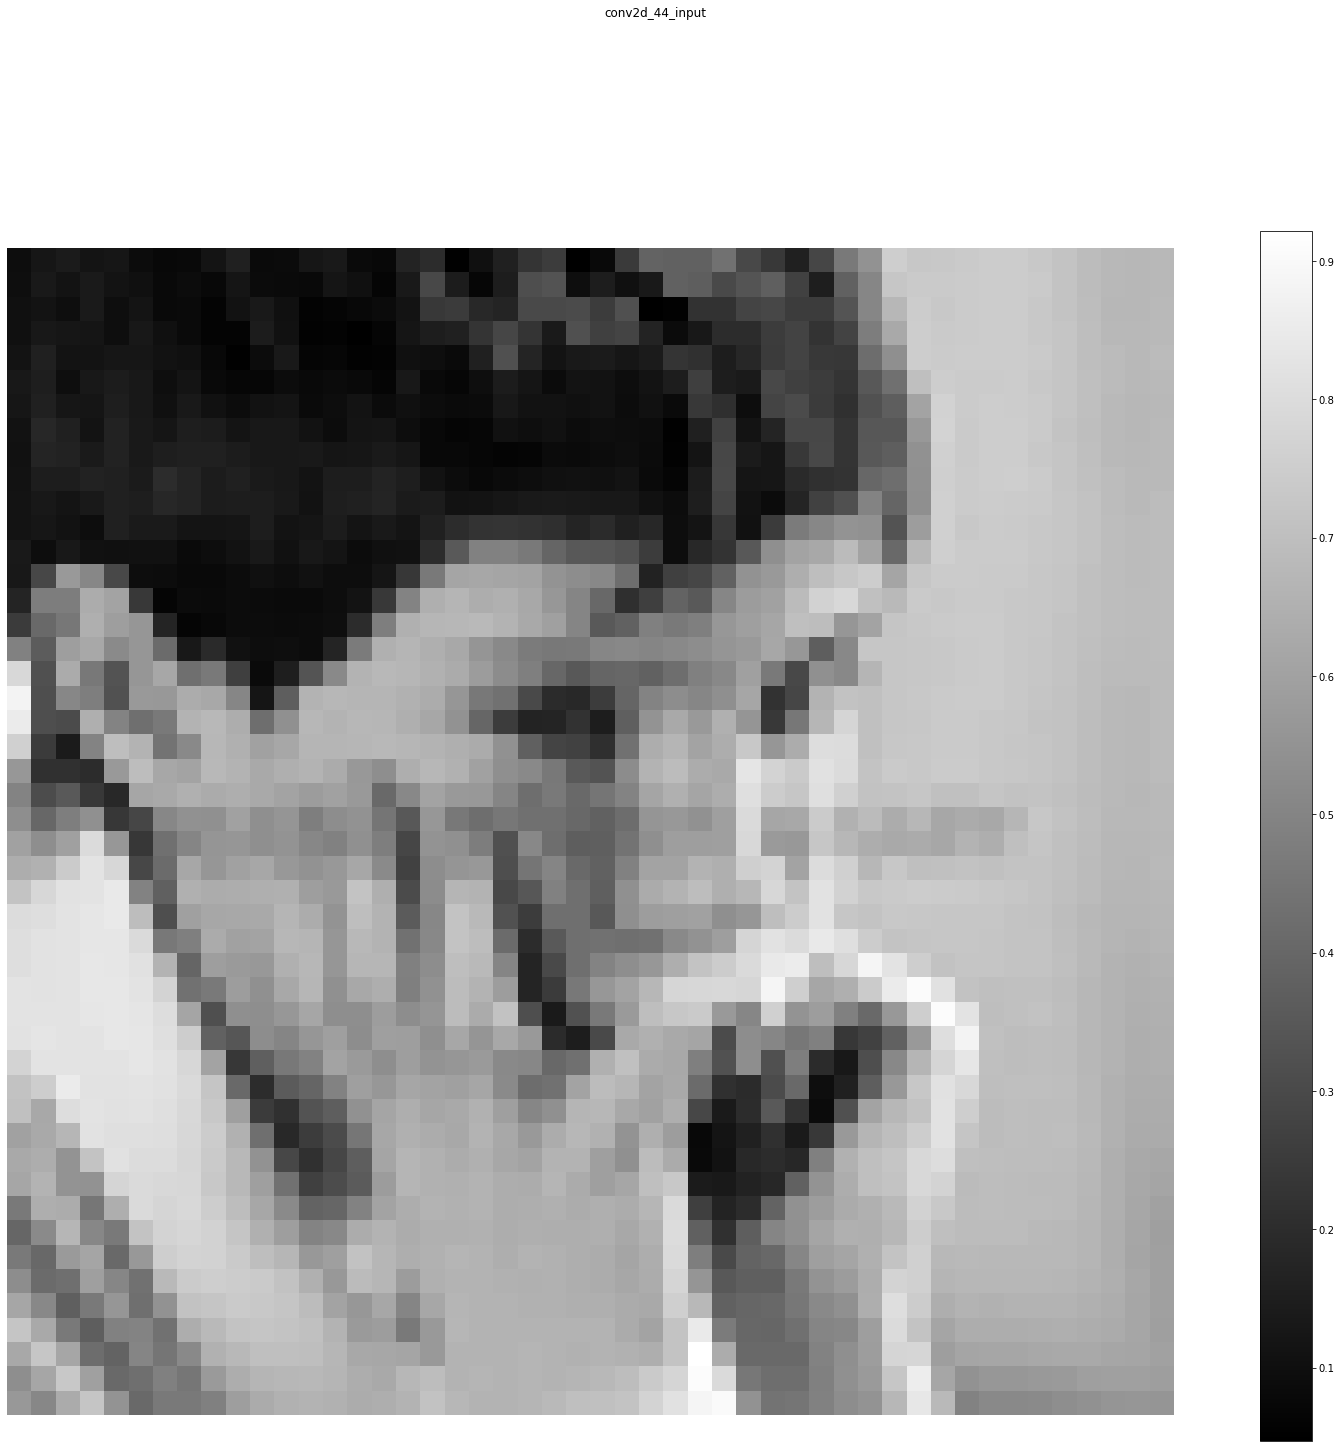

conv2d_44 (1, 48, 48, 64) 


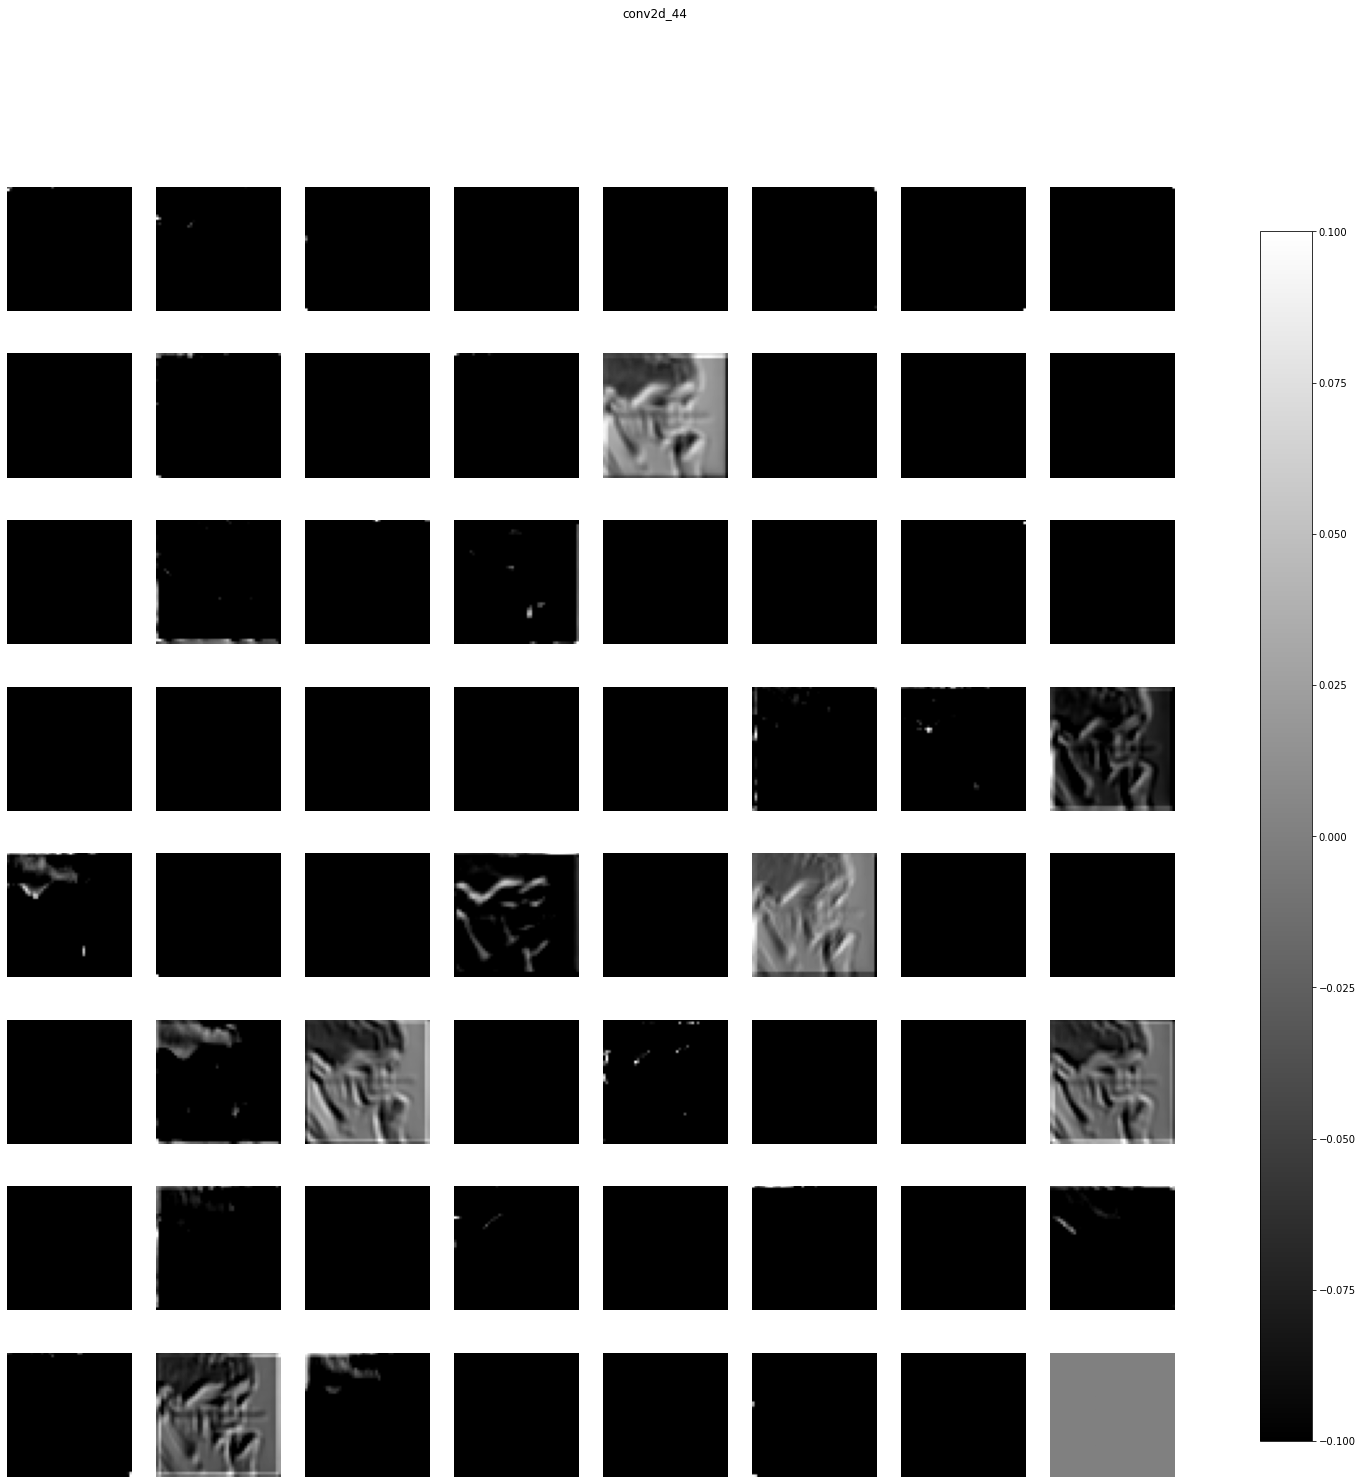

conv2d_45 (1, 48, 48, 64) 


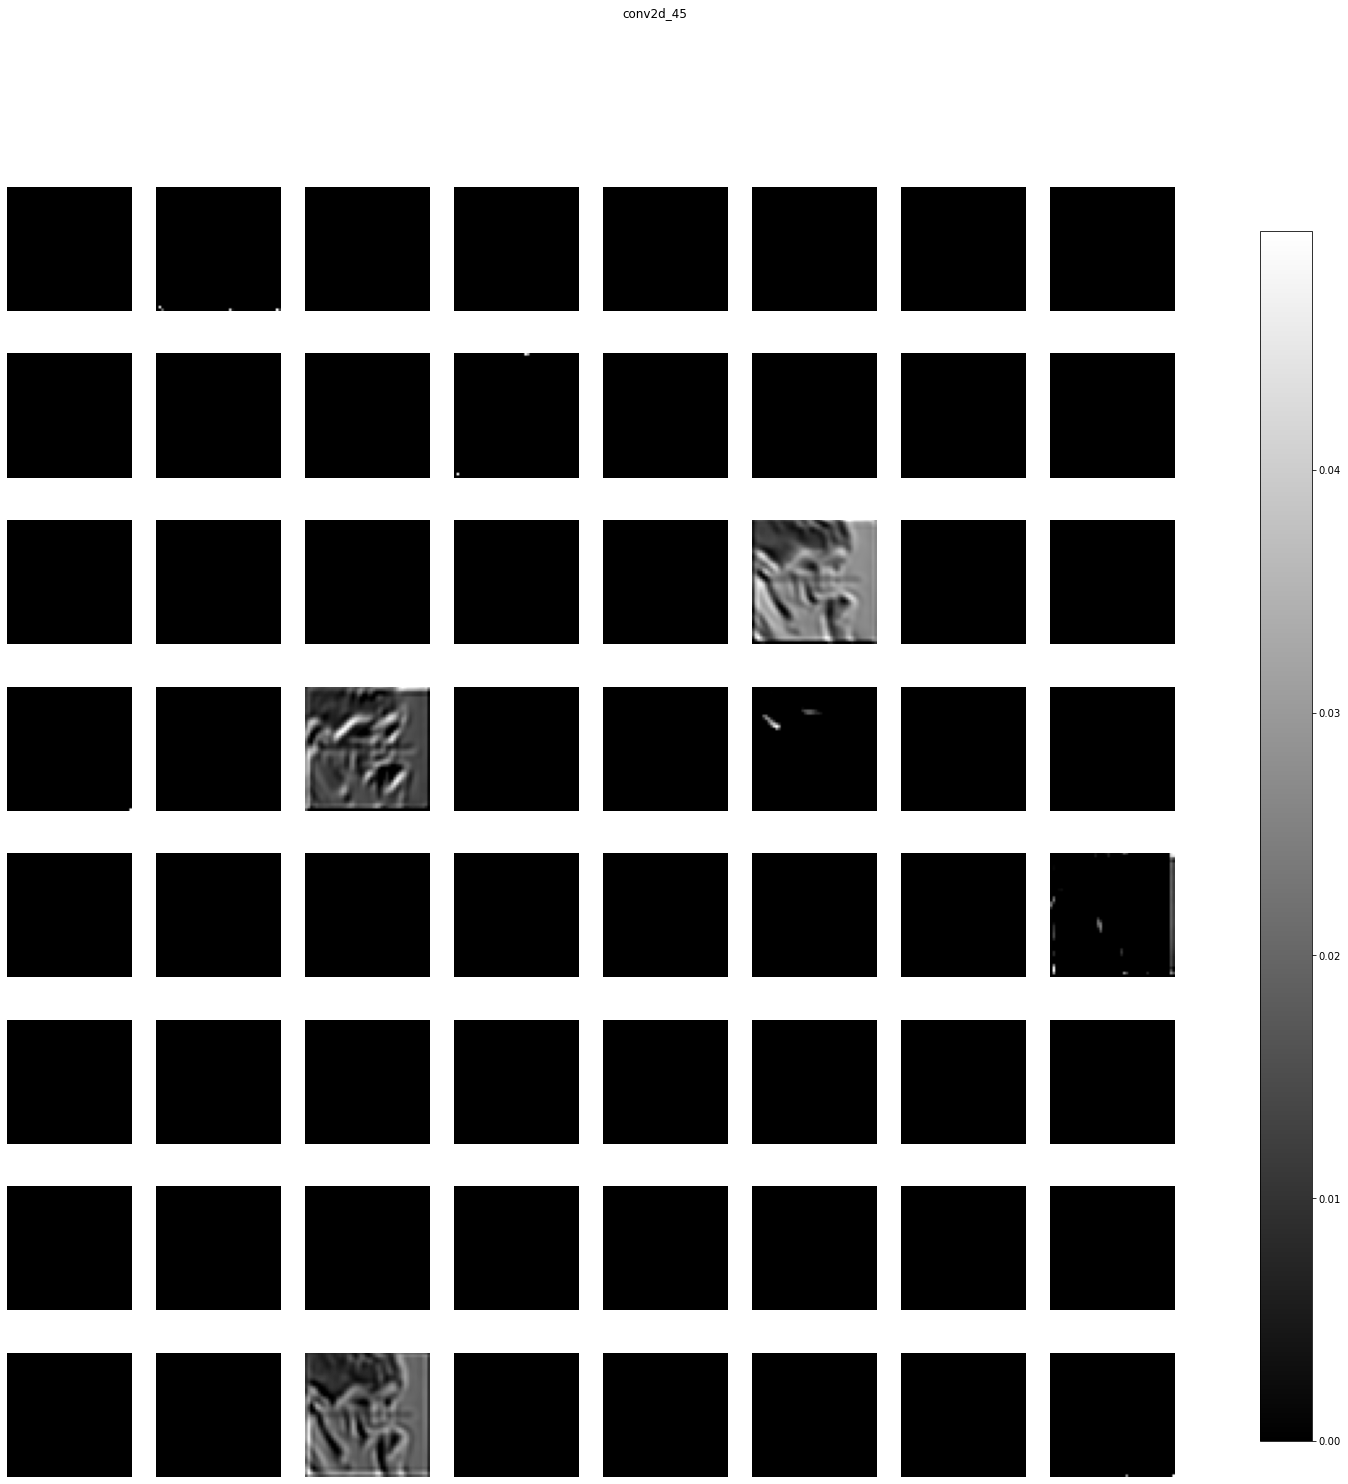

conv2d_46 (1, 48, 48, 64) 


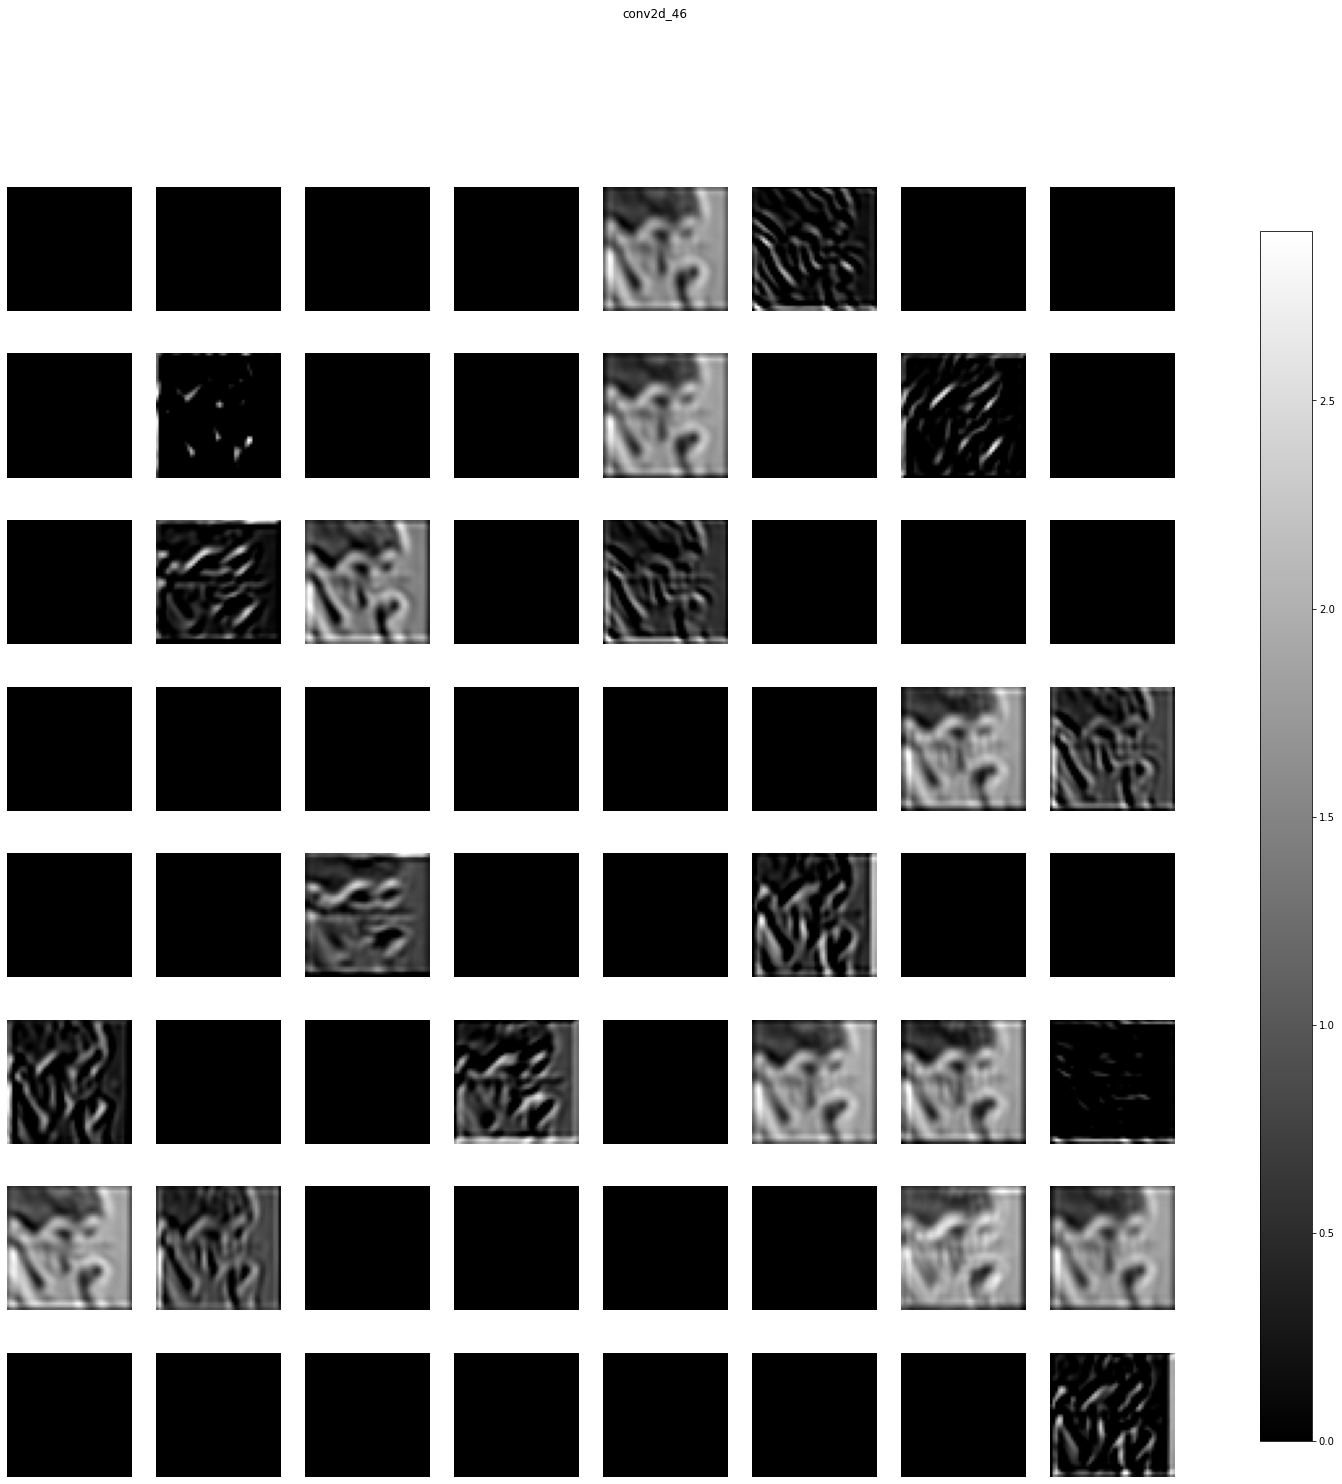

batch_normalization_25 (1, 48, 48, 64) 


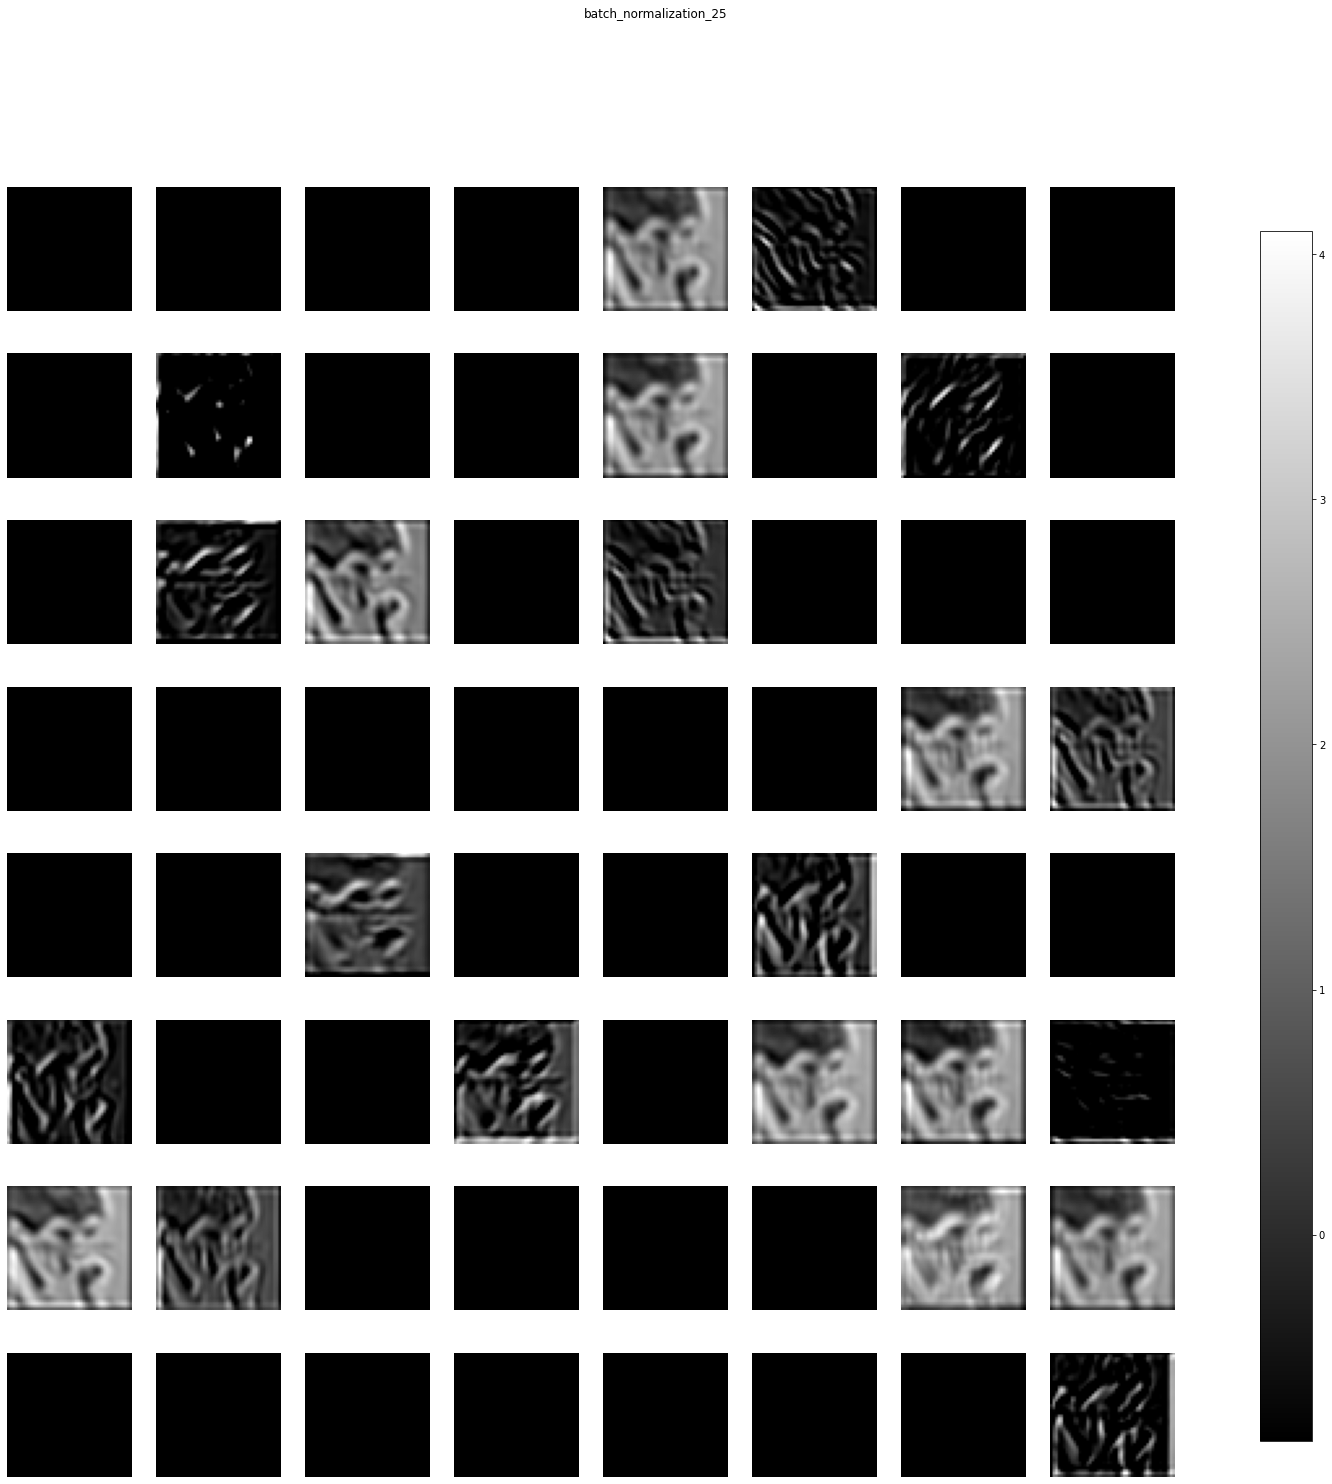

max_pooling2d_29 (1, 24, 24, 64) 


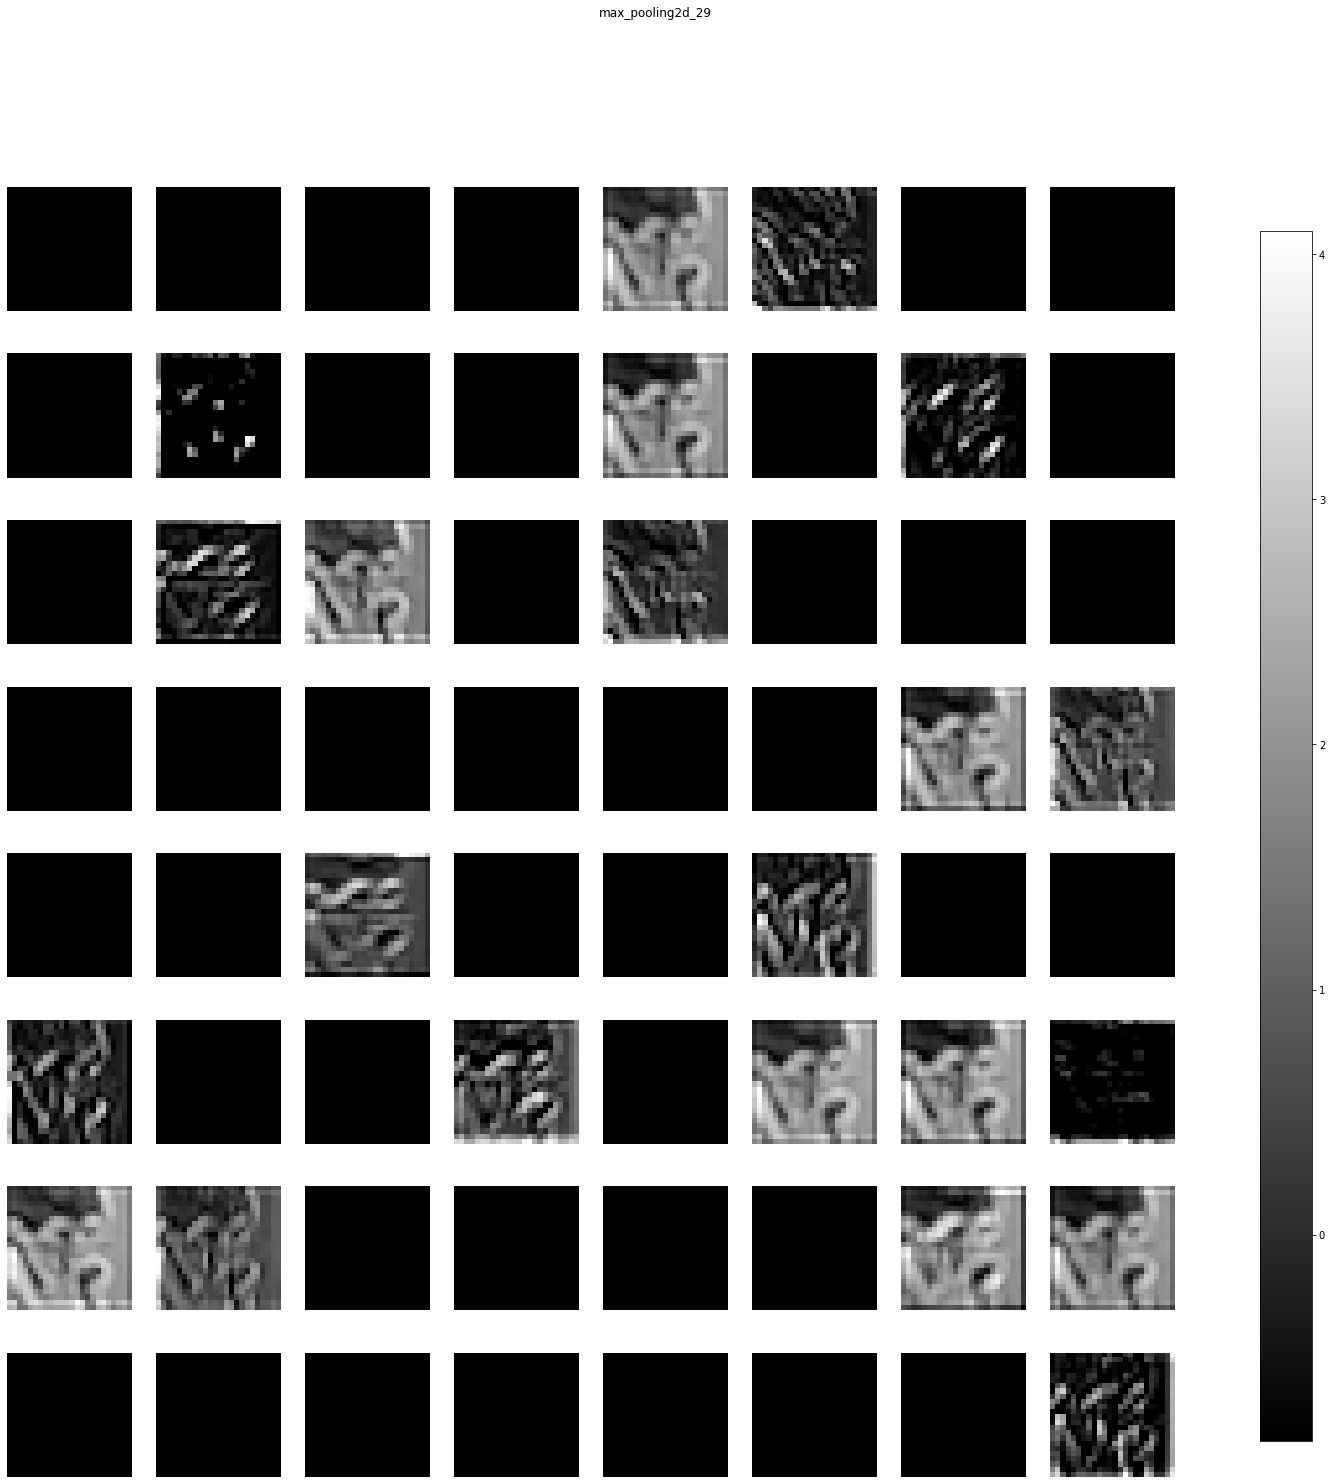

conv2d_47 (1, 24, 24, 128) 


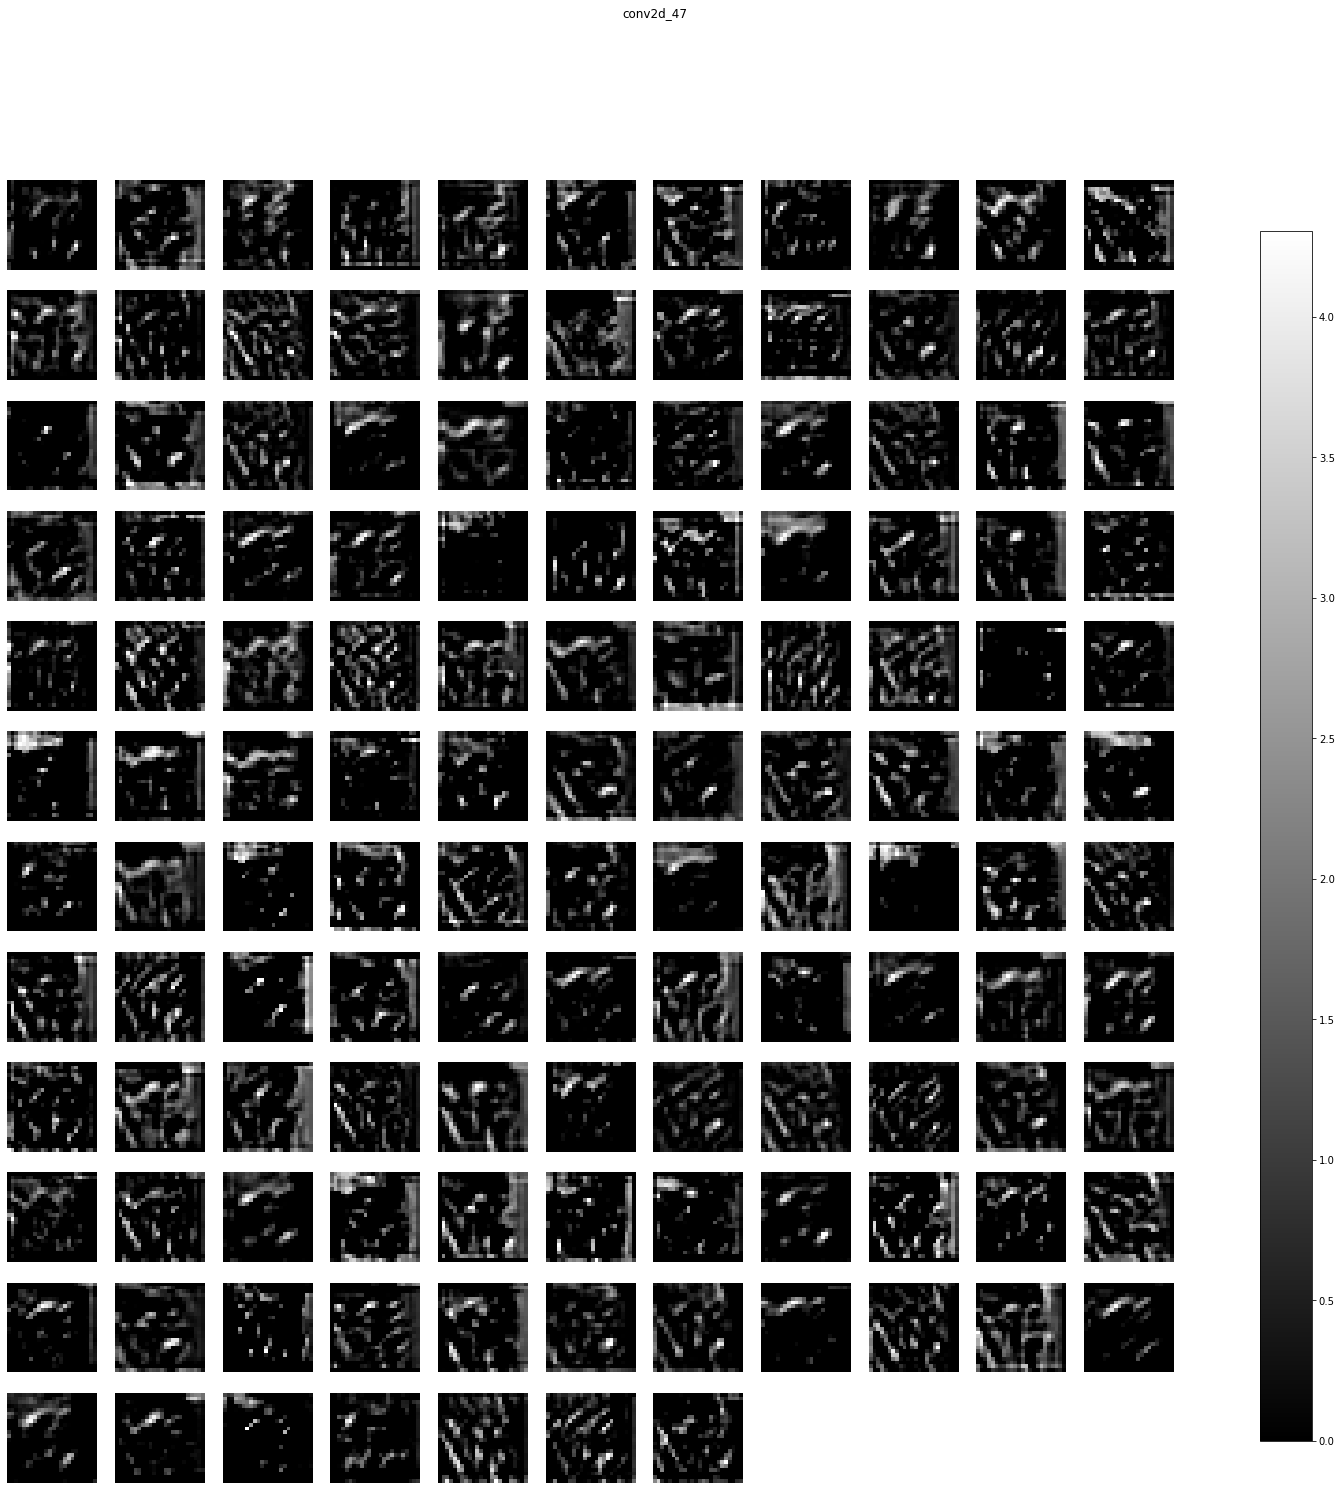

conv2d_48 (1, 24, 24, 128) 


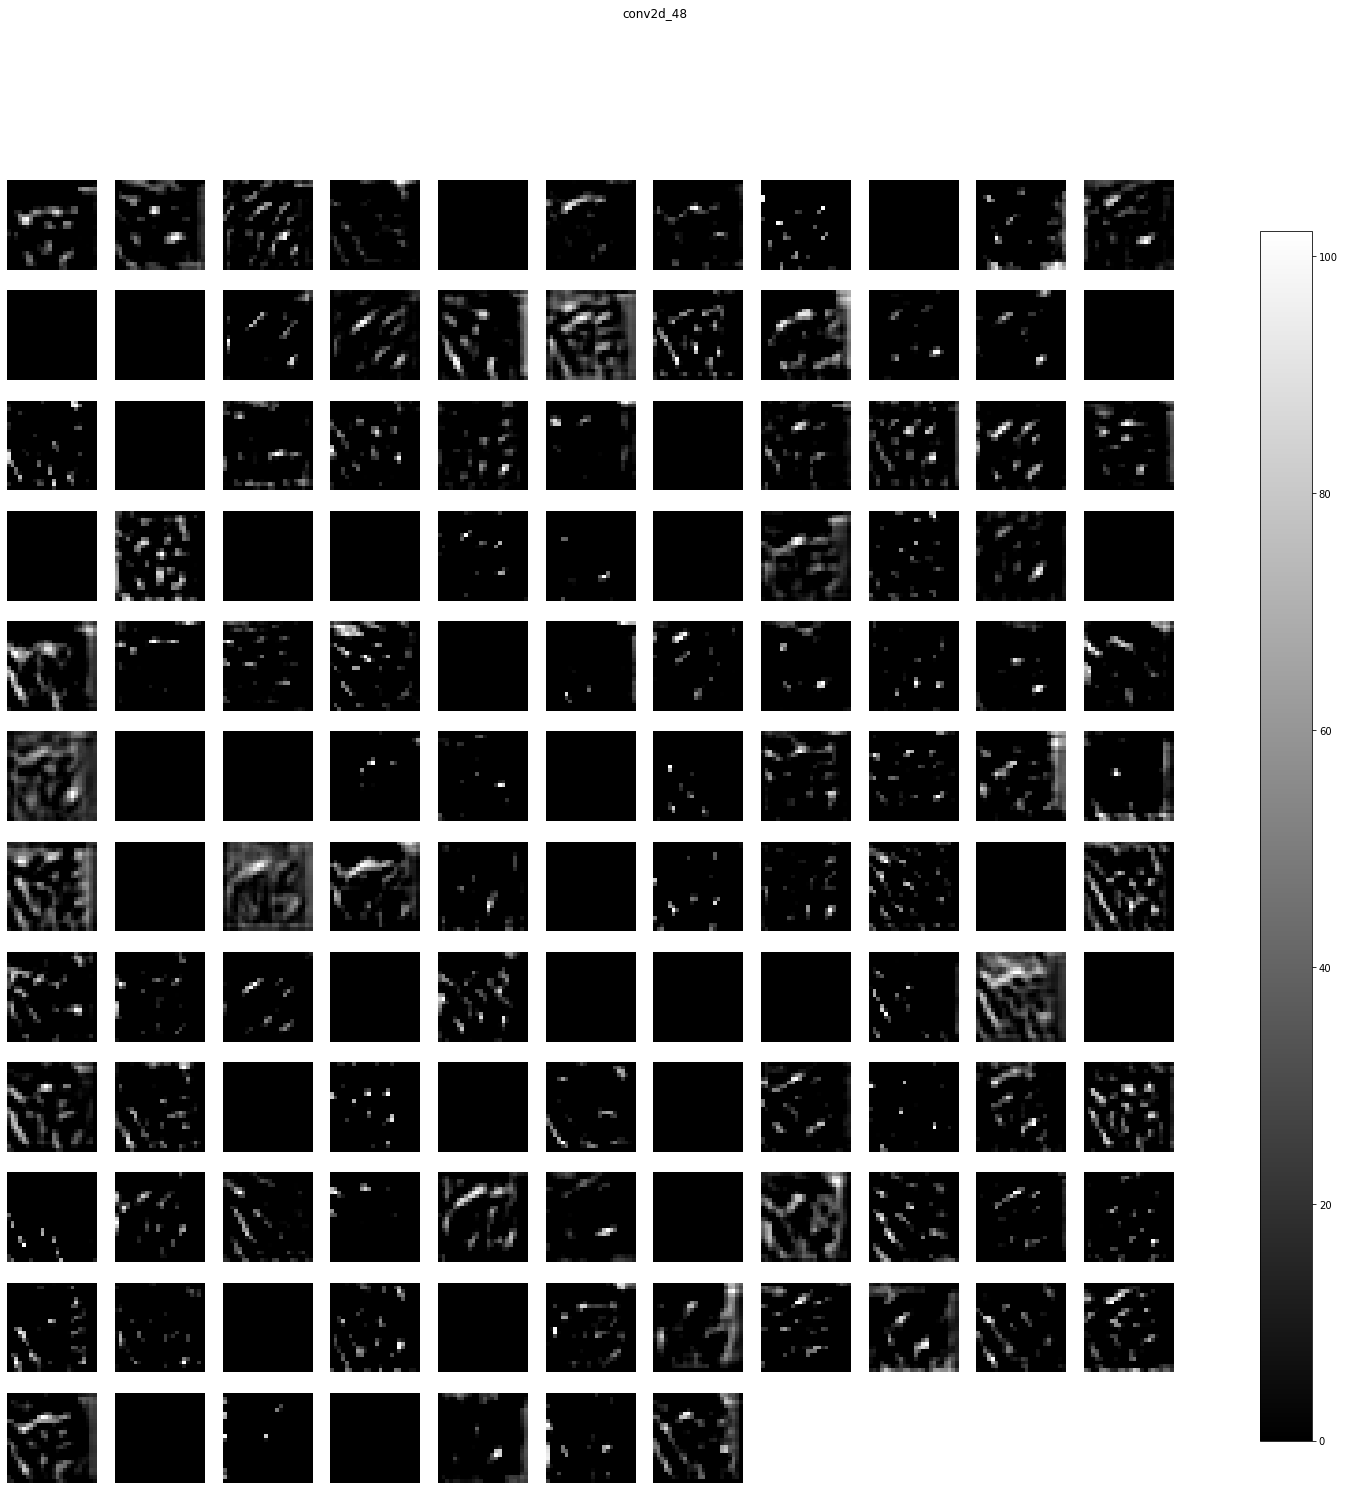

batch_normalization_26 (1, 24, 24, 128) 


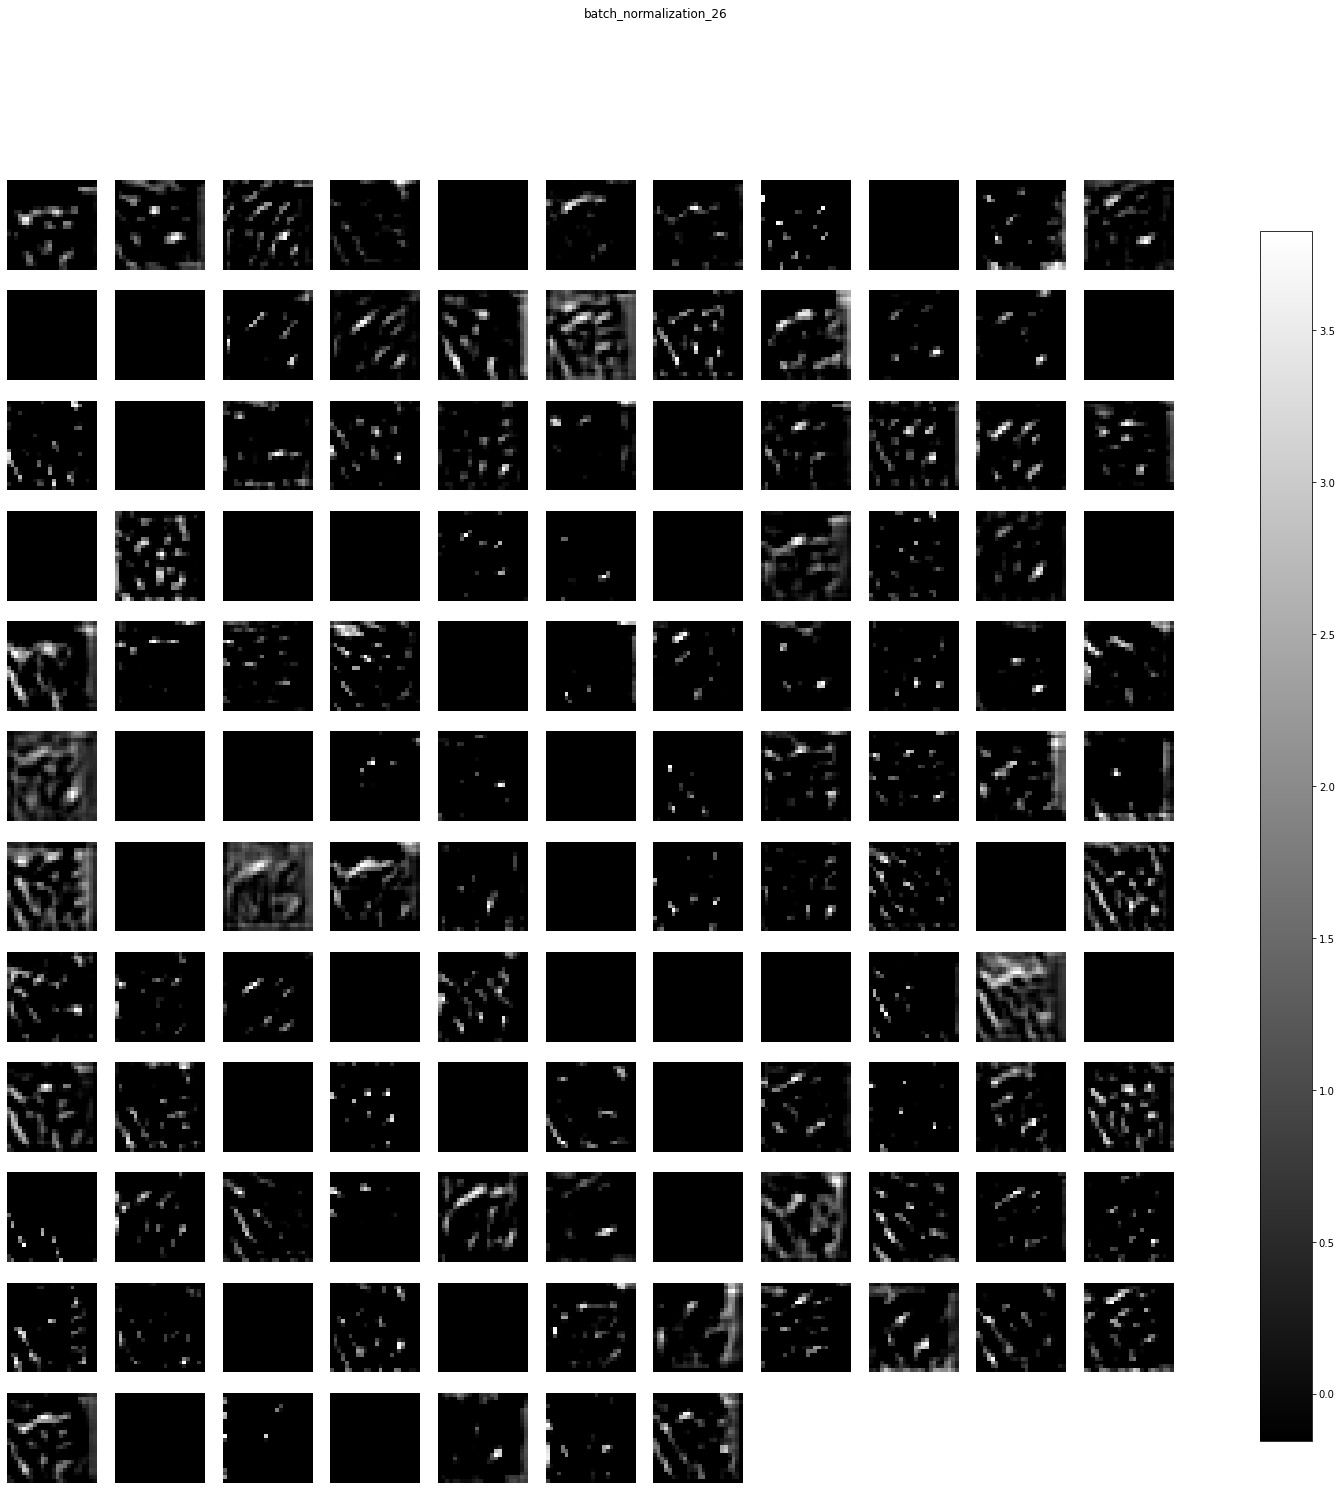

max_pooling2d_30 (1, 12, 12, 128) 


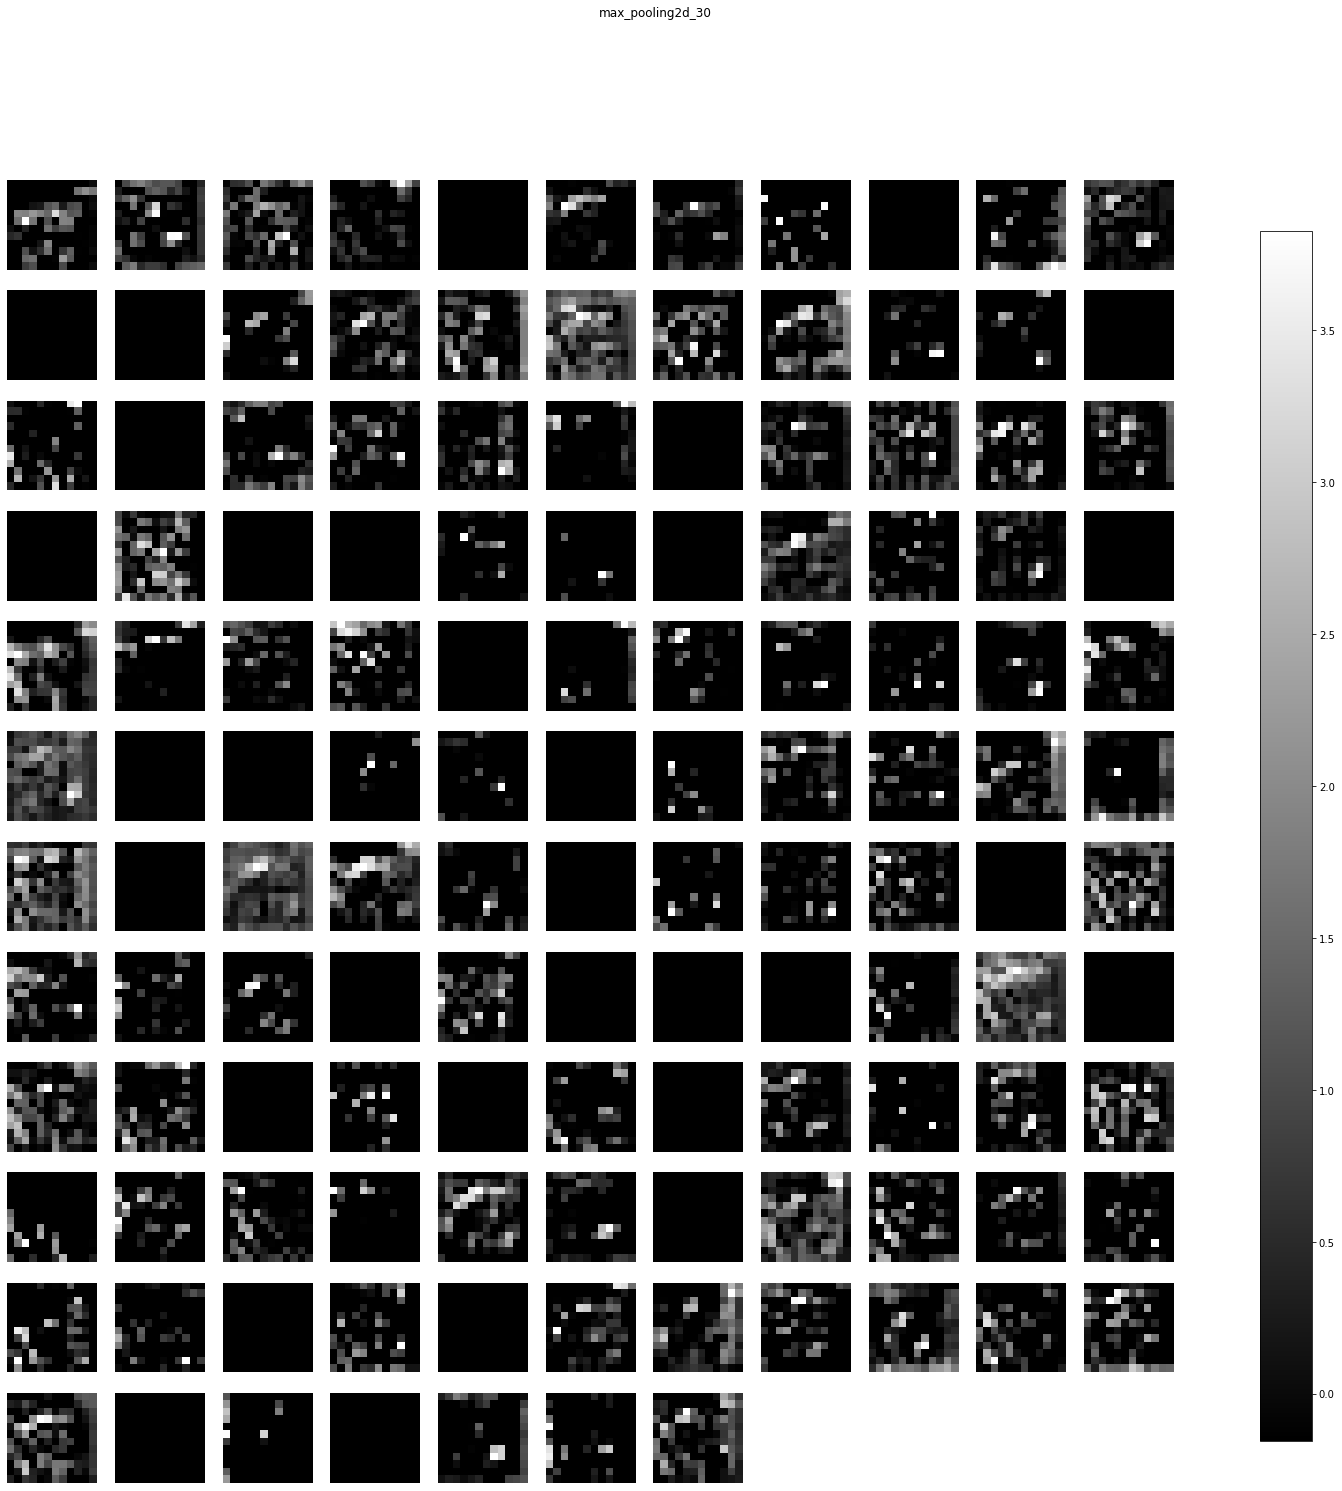

conv2d_49 (1, 12, 12, 256) 


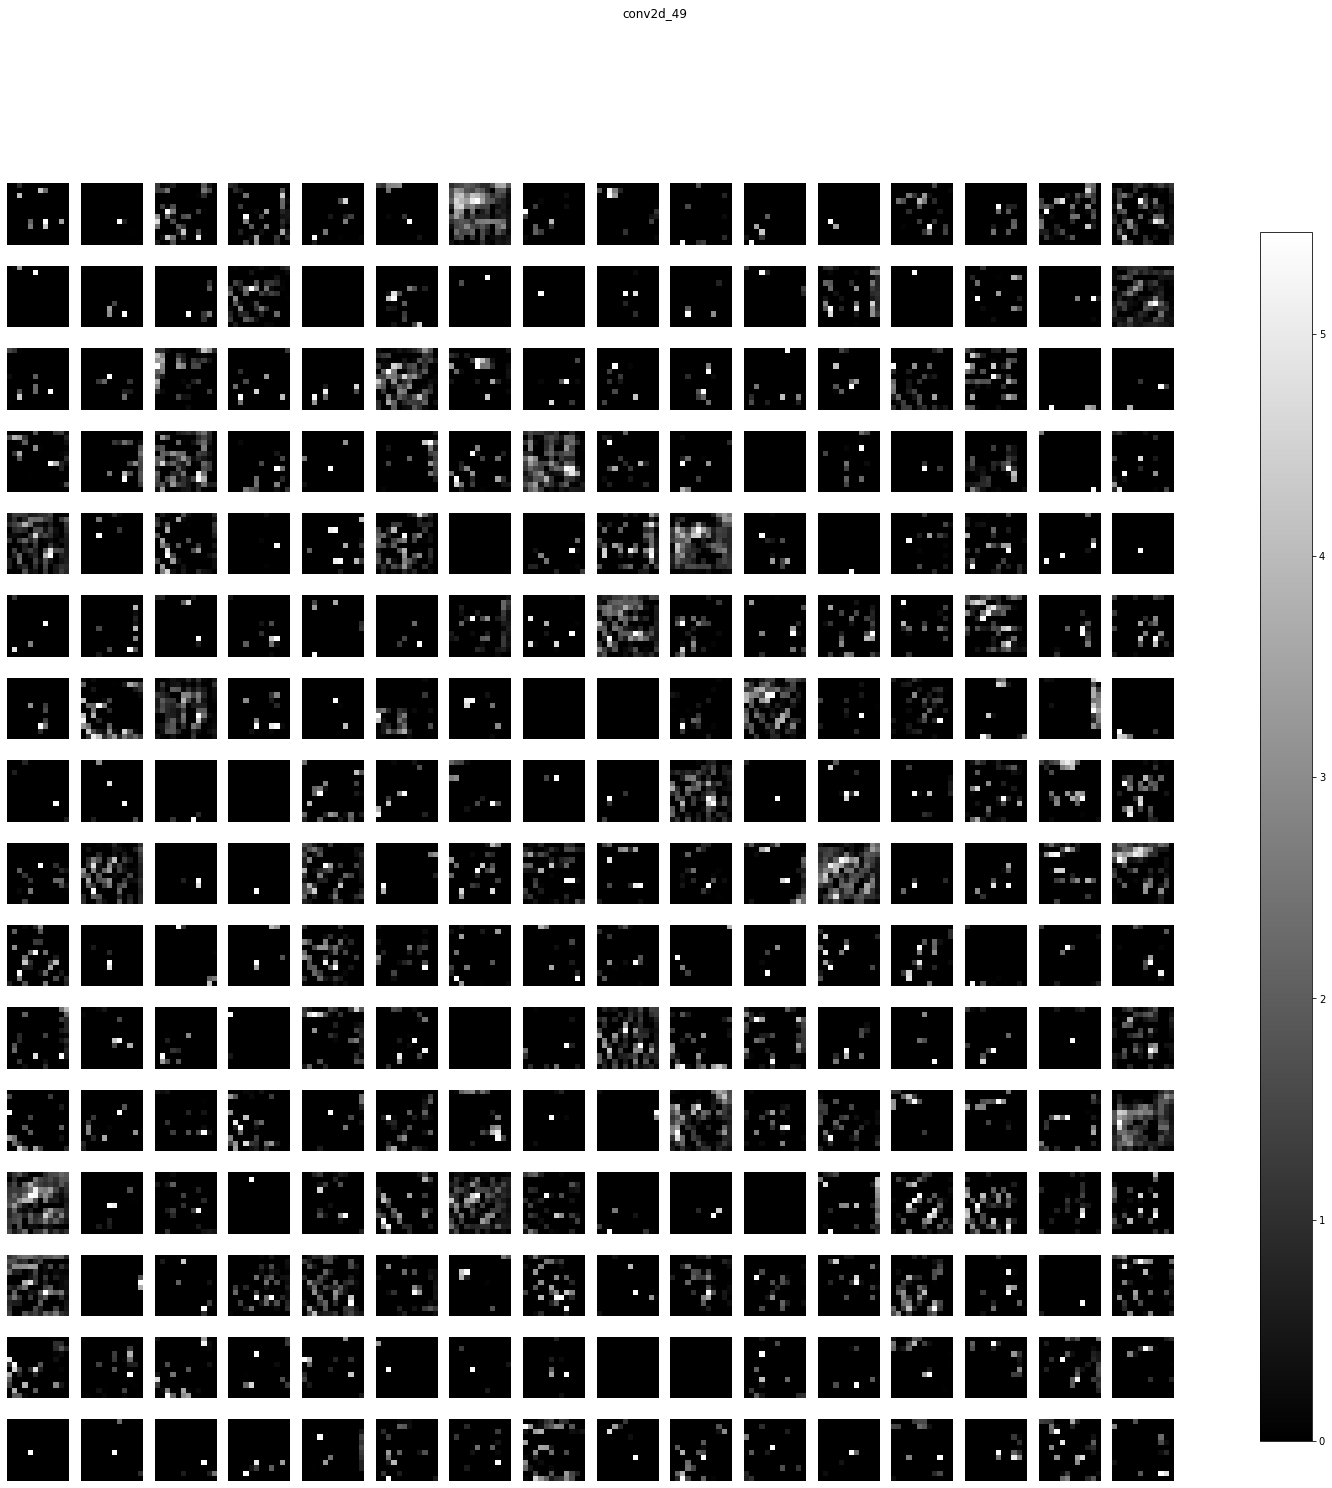

batch_normalization_27 (1, 12, 12, 256) 


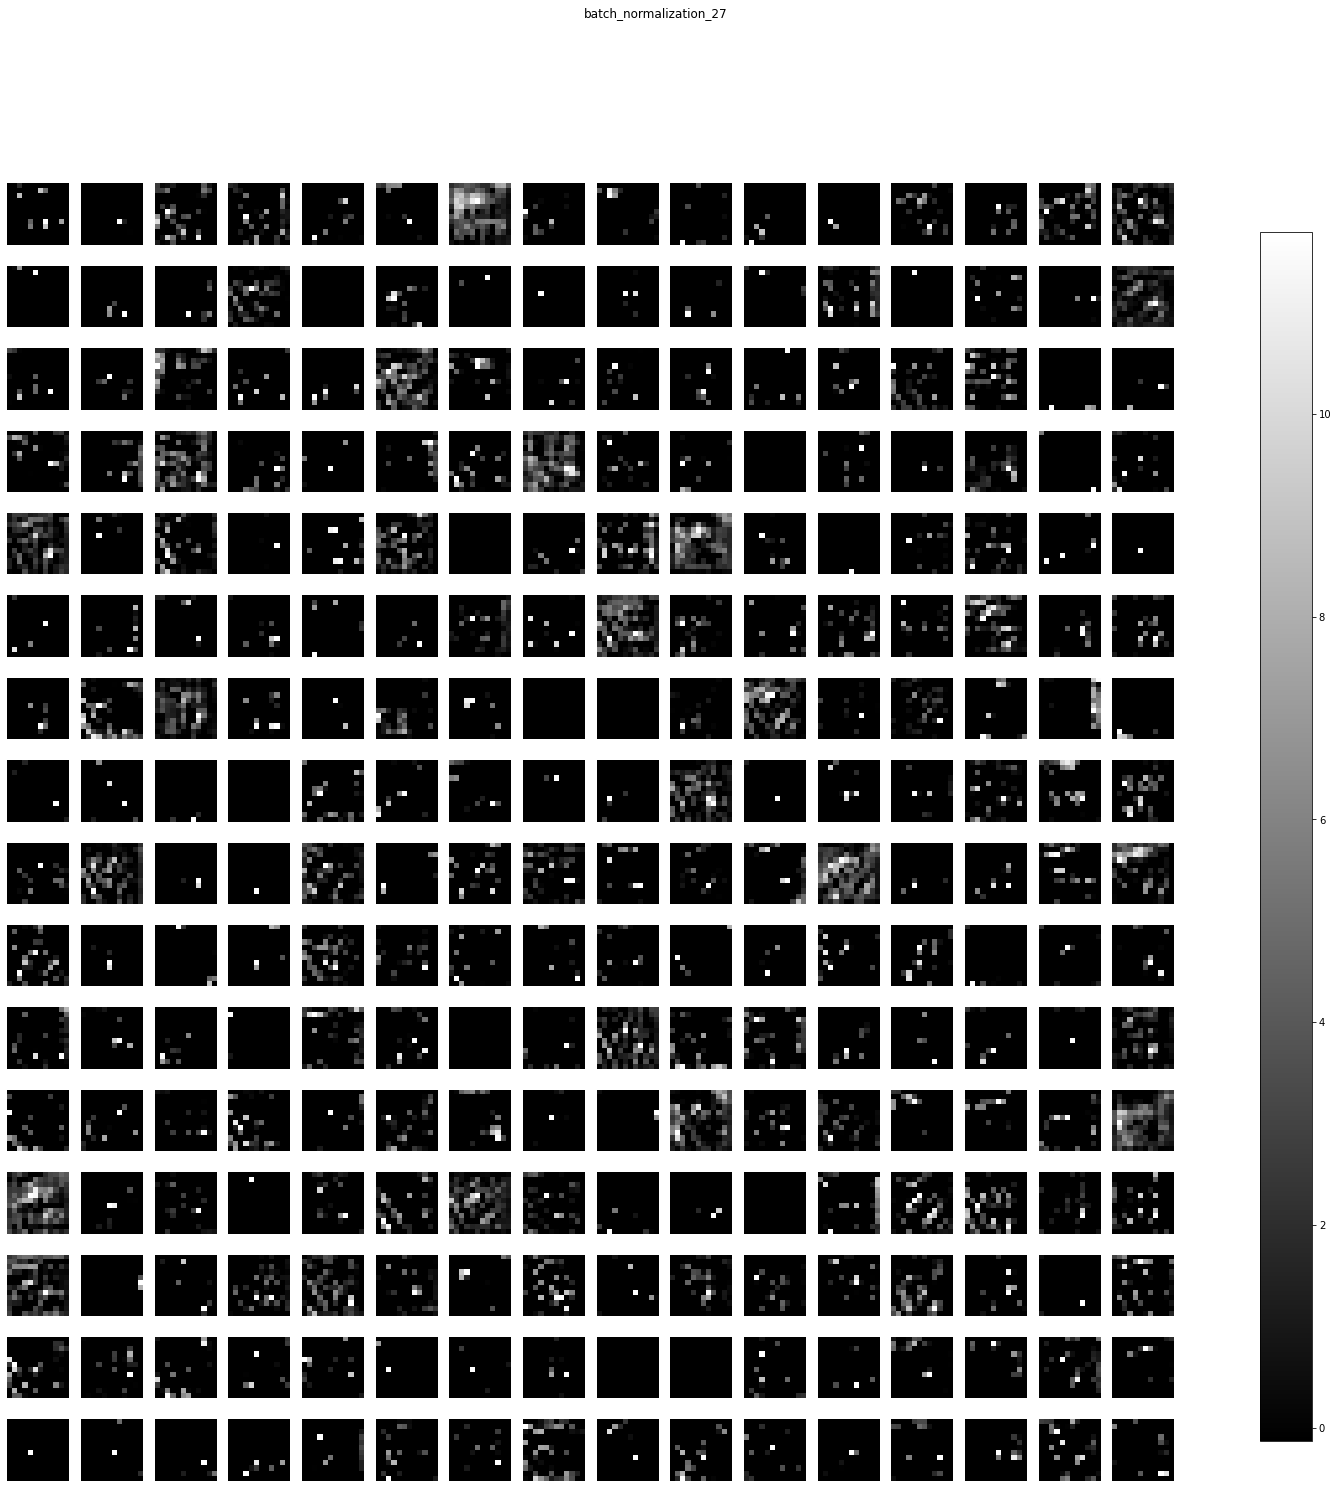

max_pooling2d_31 (1, 6, 6, 256) 


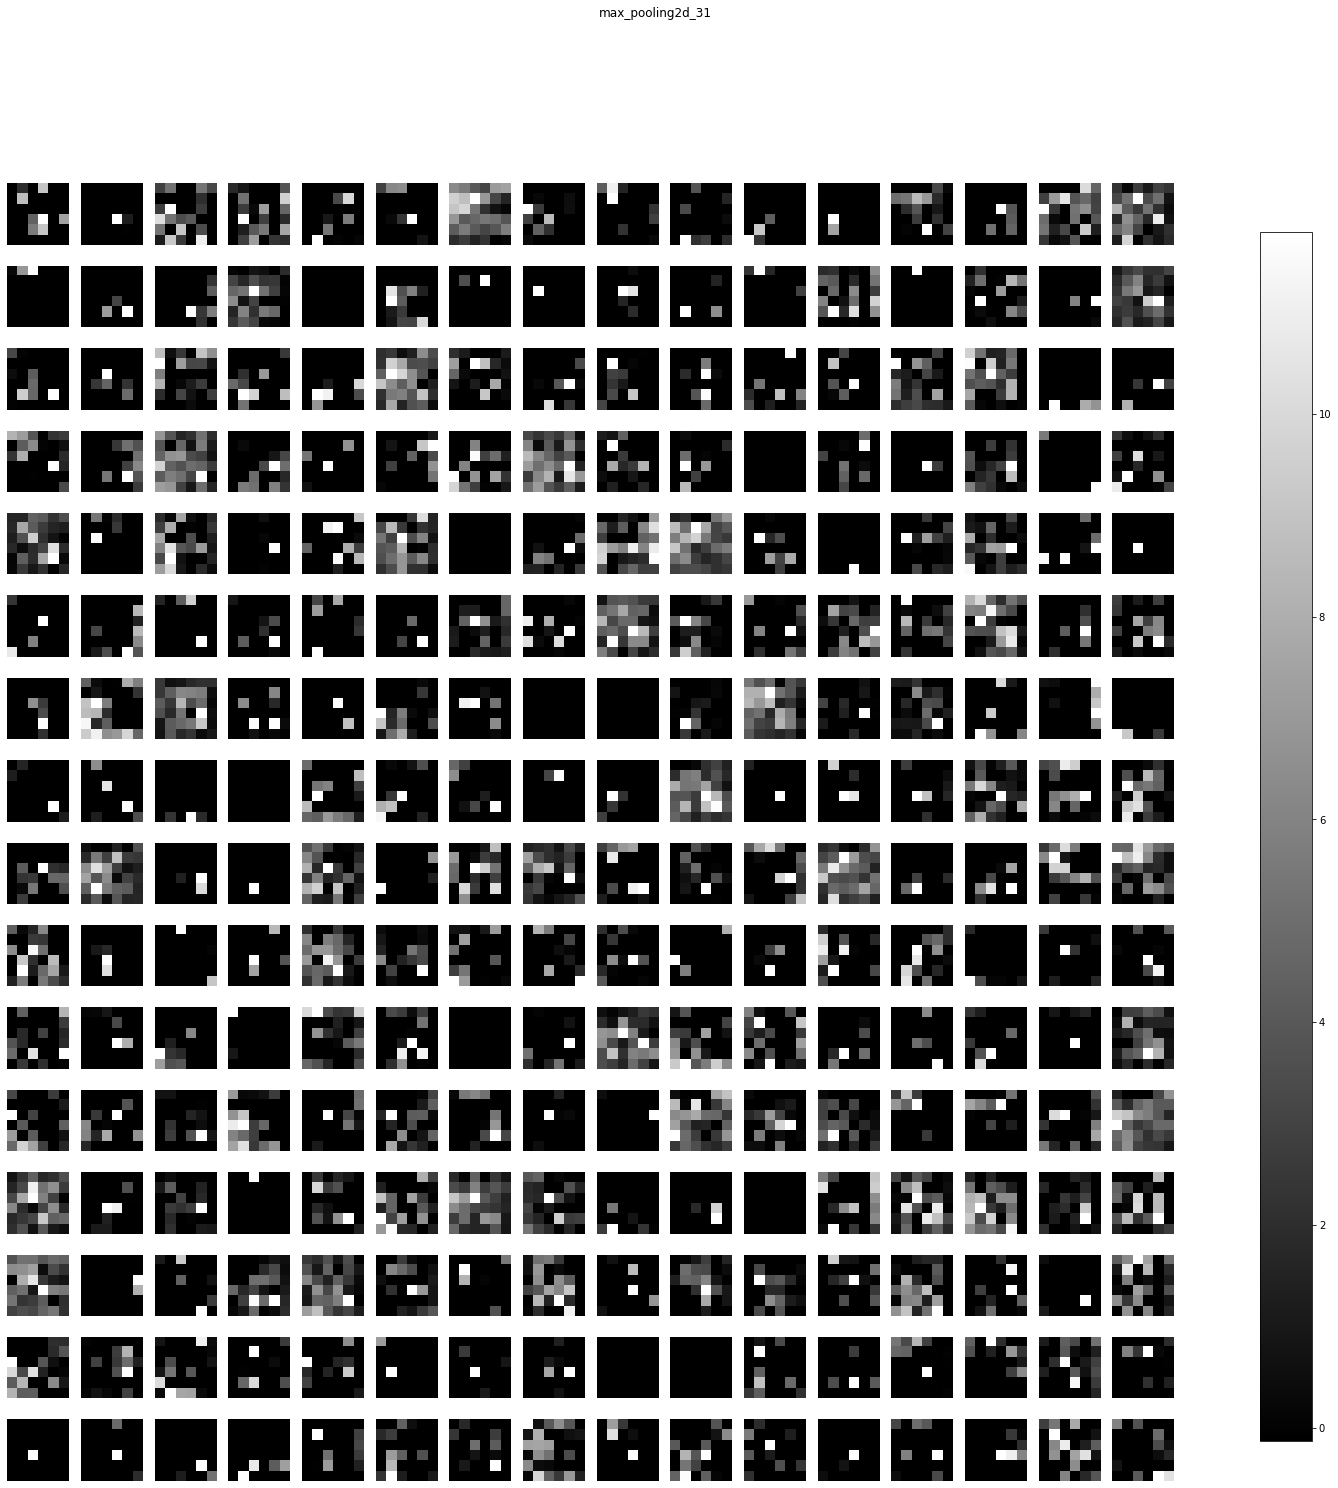

flatten_9 (1, 9216) 


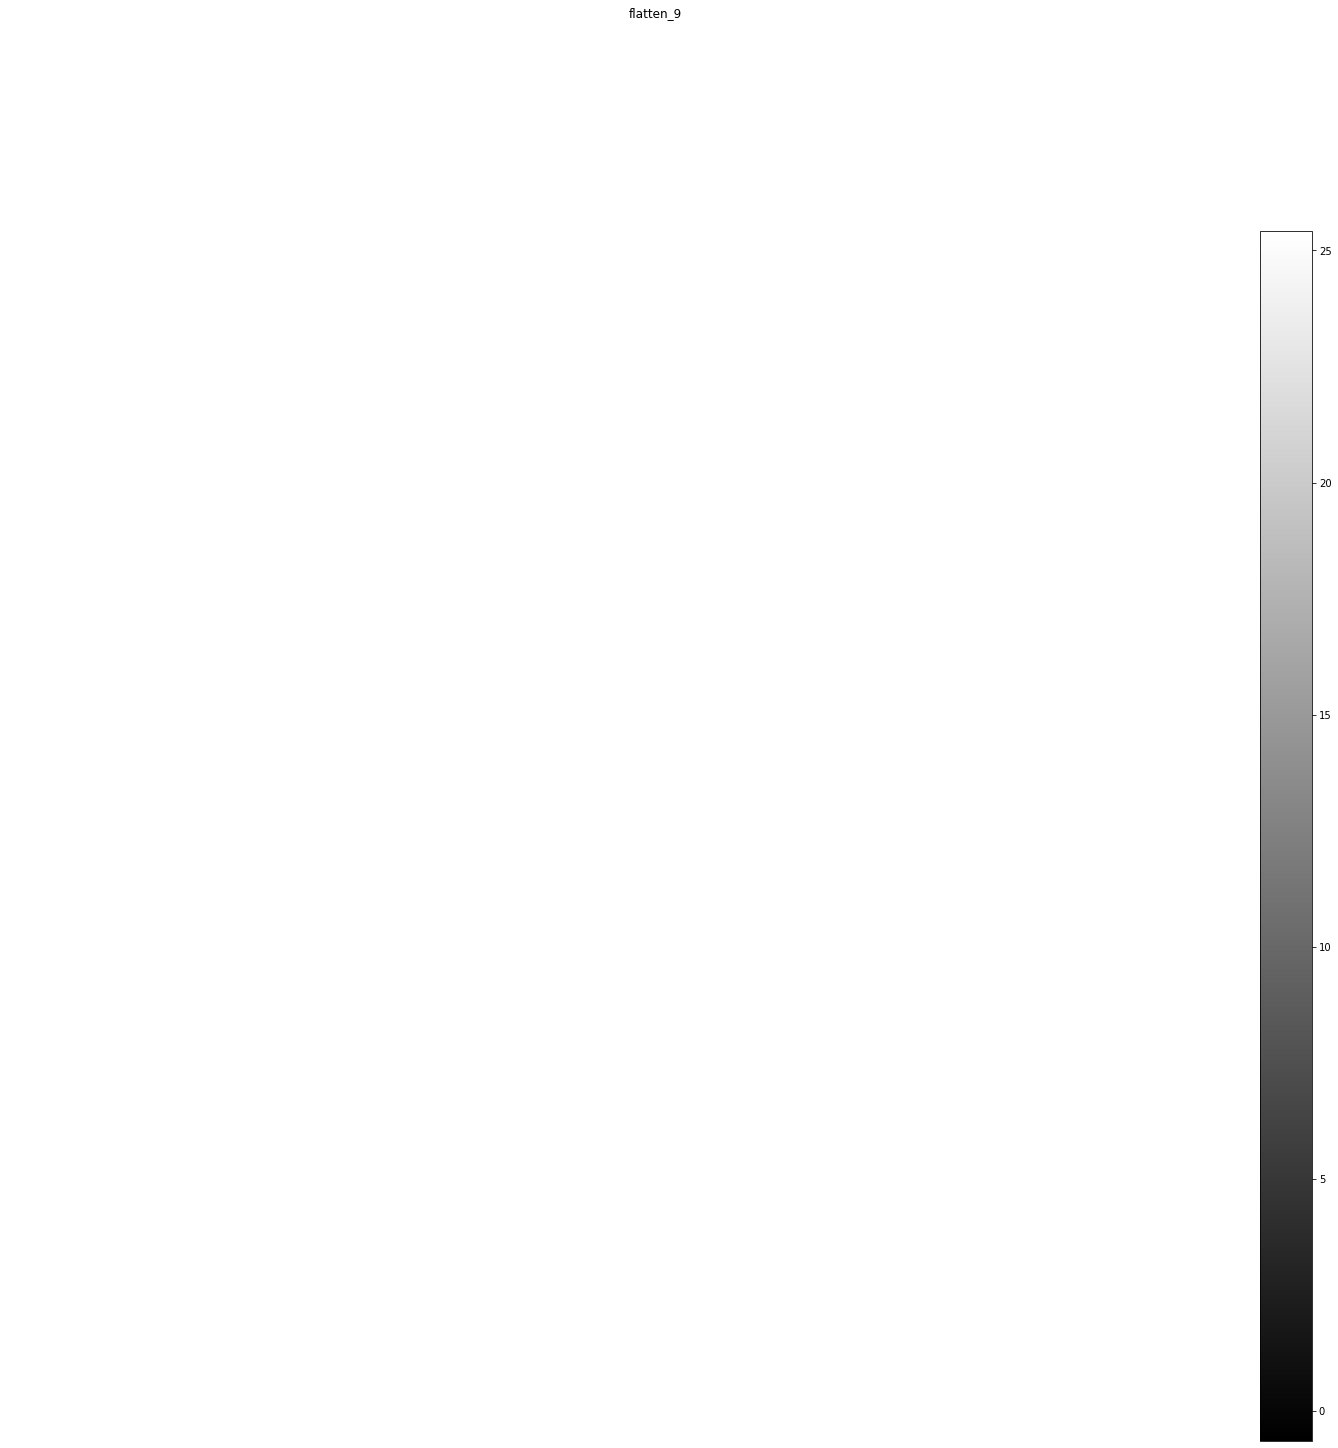

dense_26 (1, 250) 


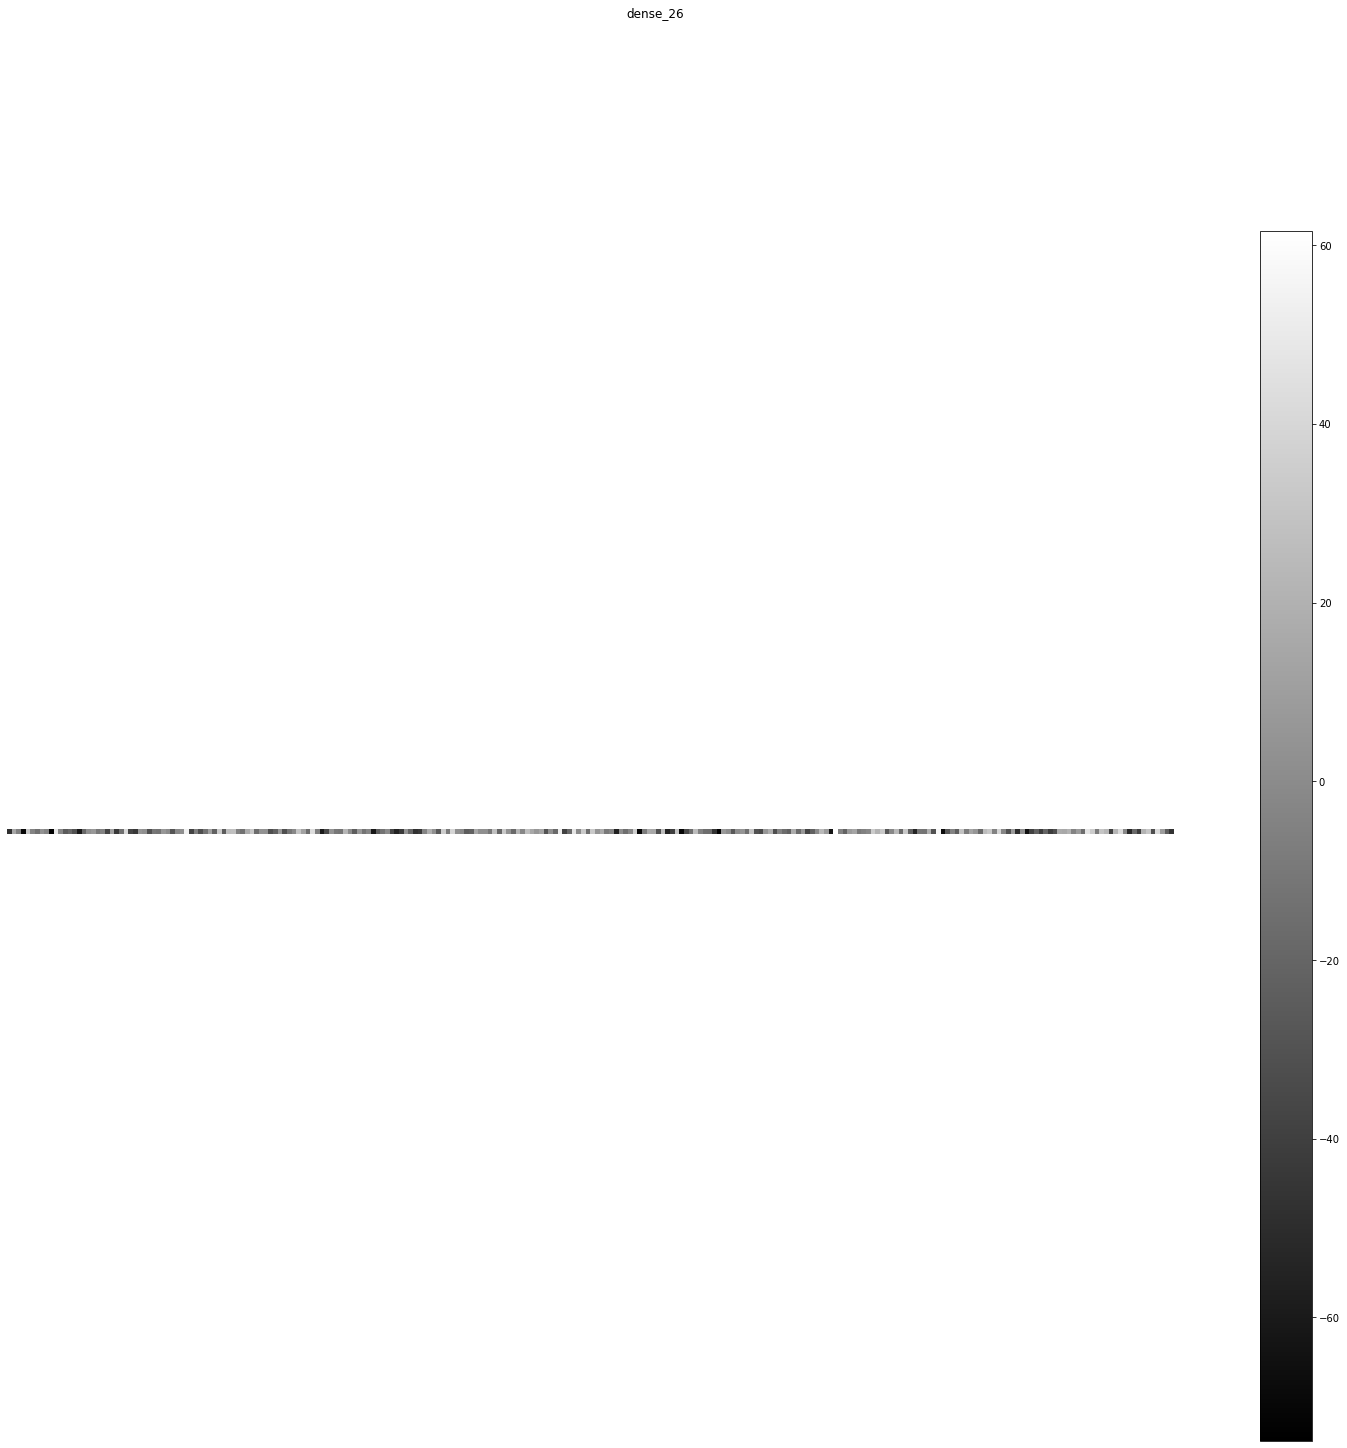

batch_normalization_28 (1, 250) 


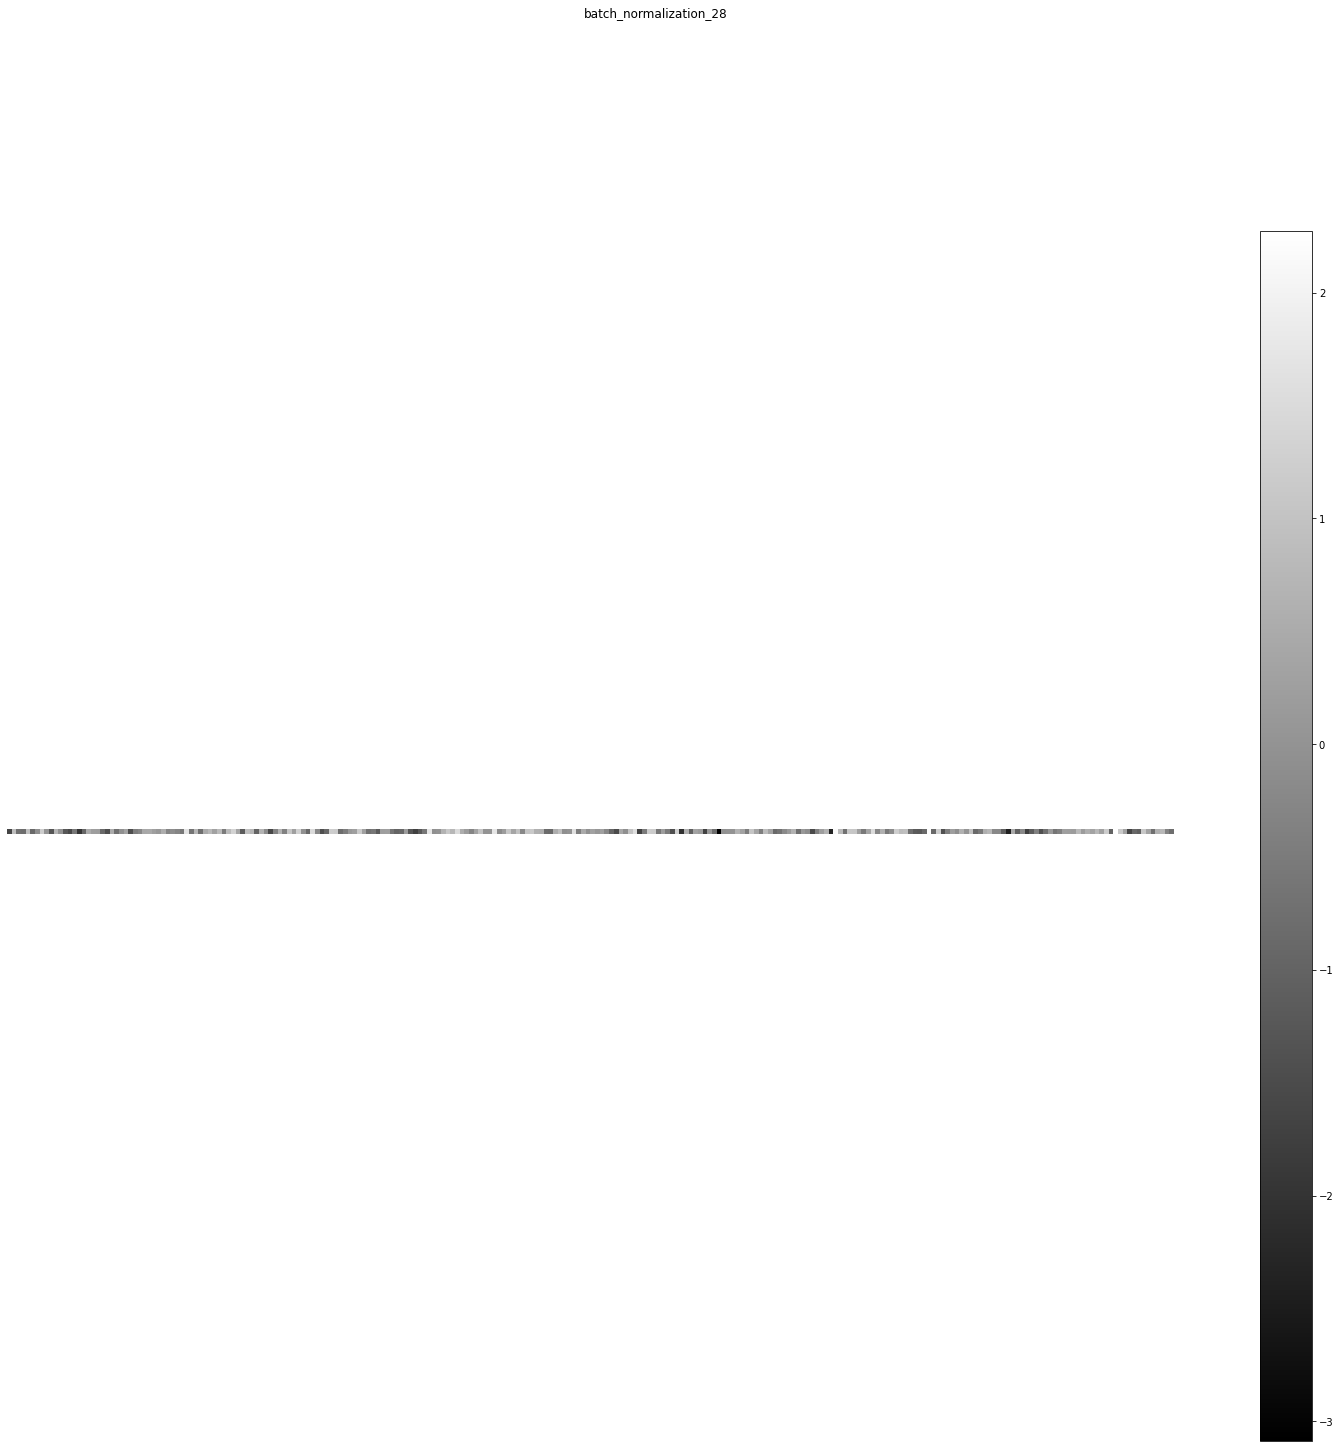

activation_25 (1, 250) 


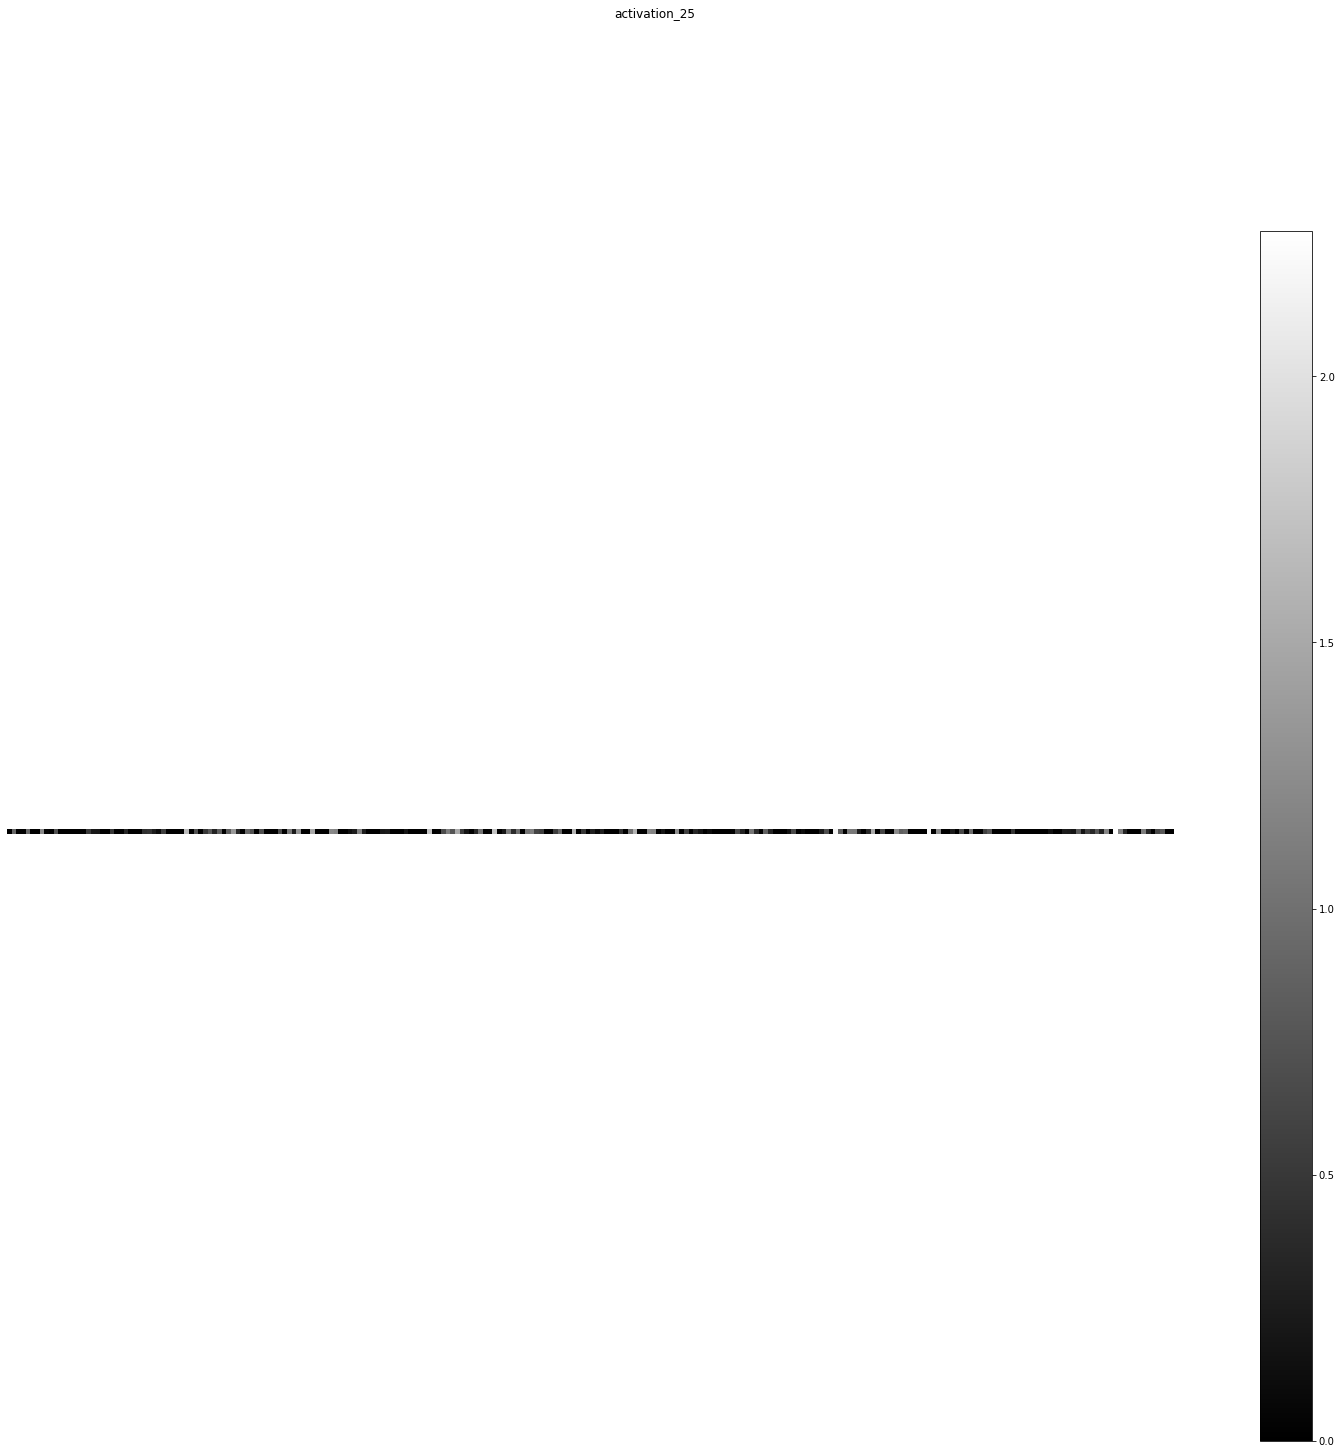

dropout_13 (1, 250) 


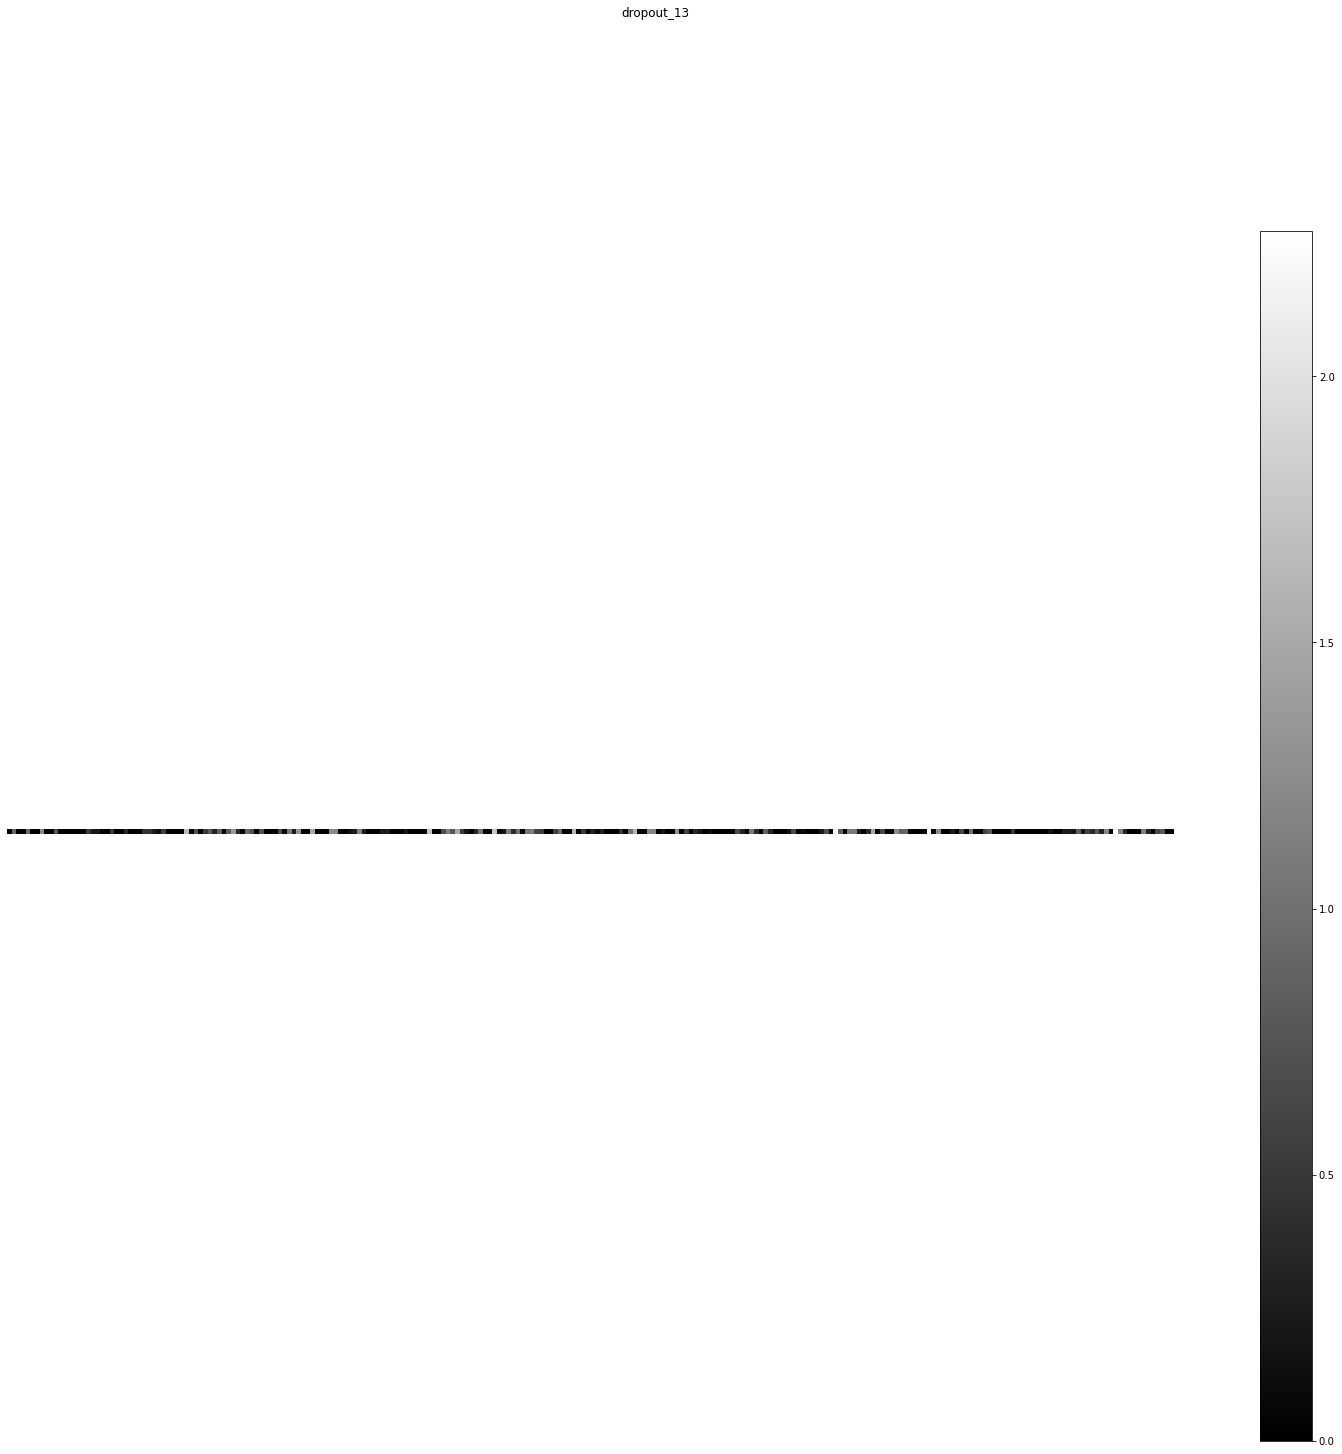

dense_27 (1, 250) 


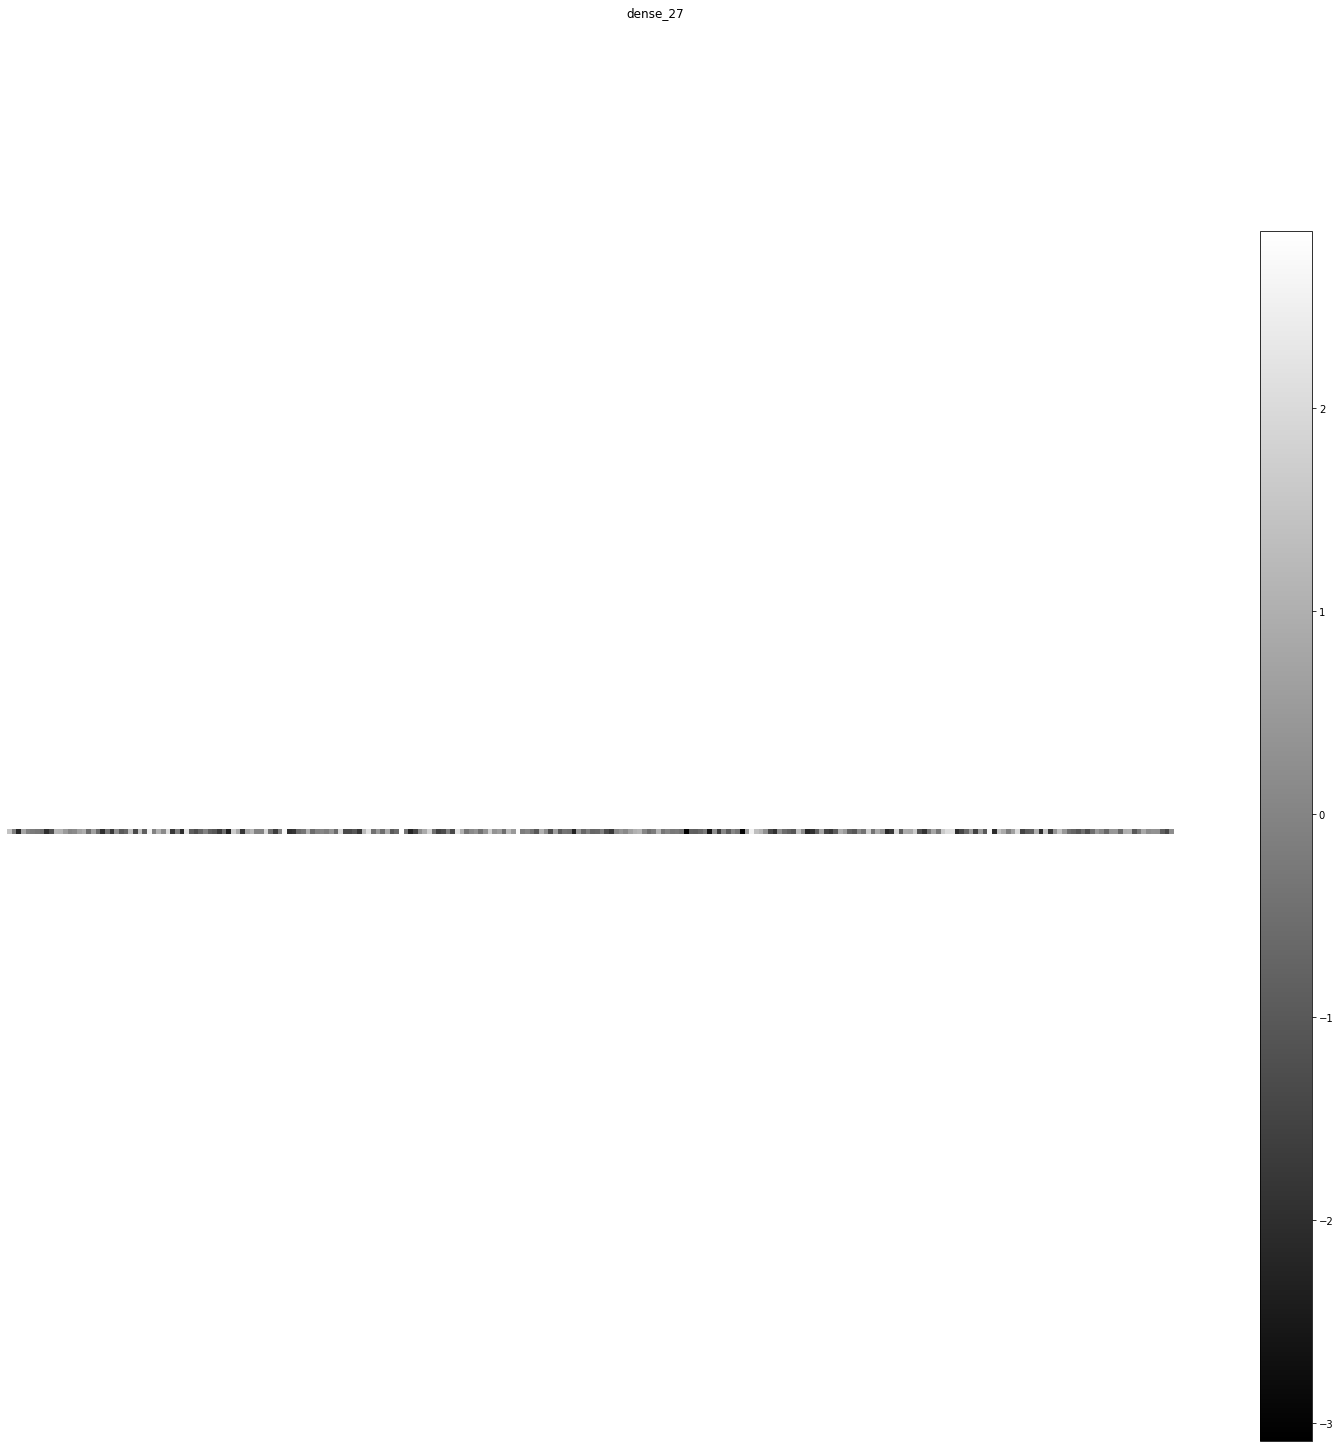

batch_normalization_29 (1, 250) 


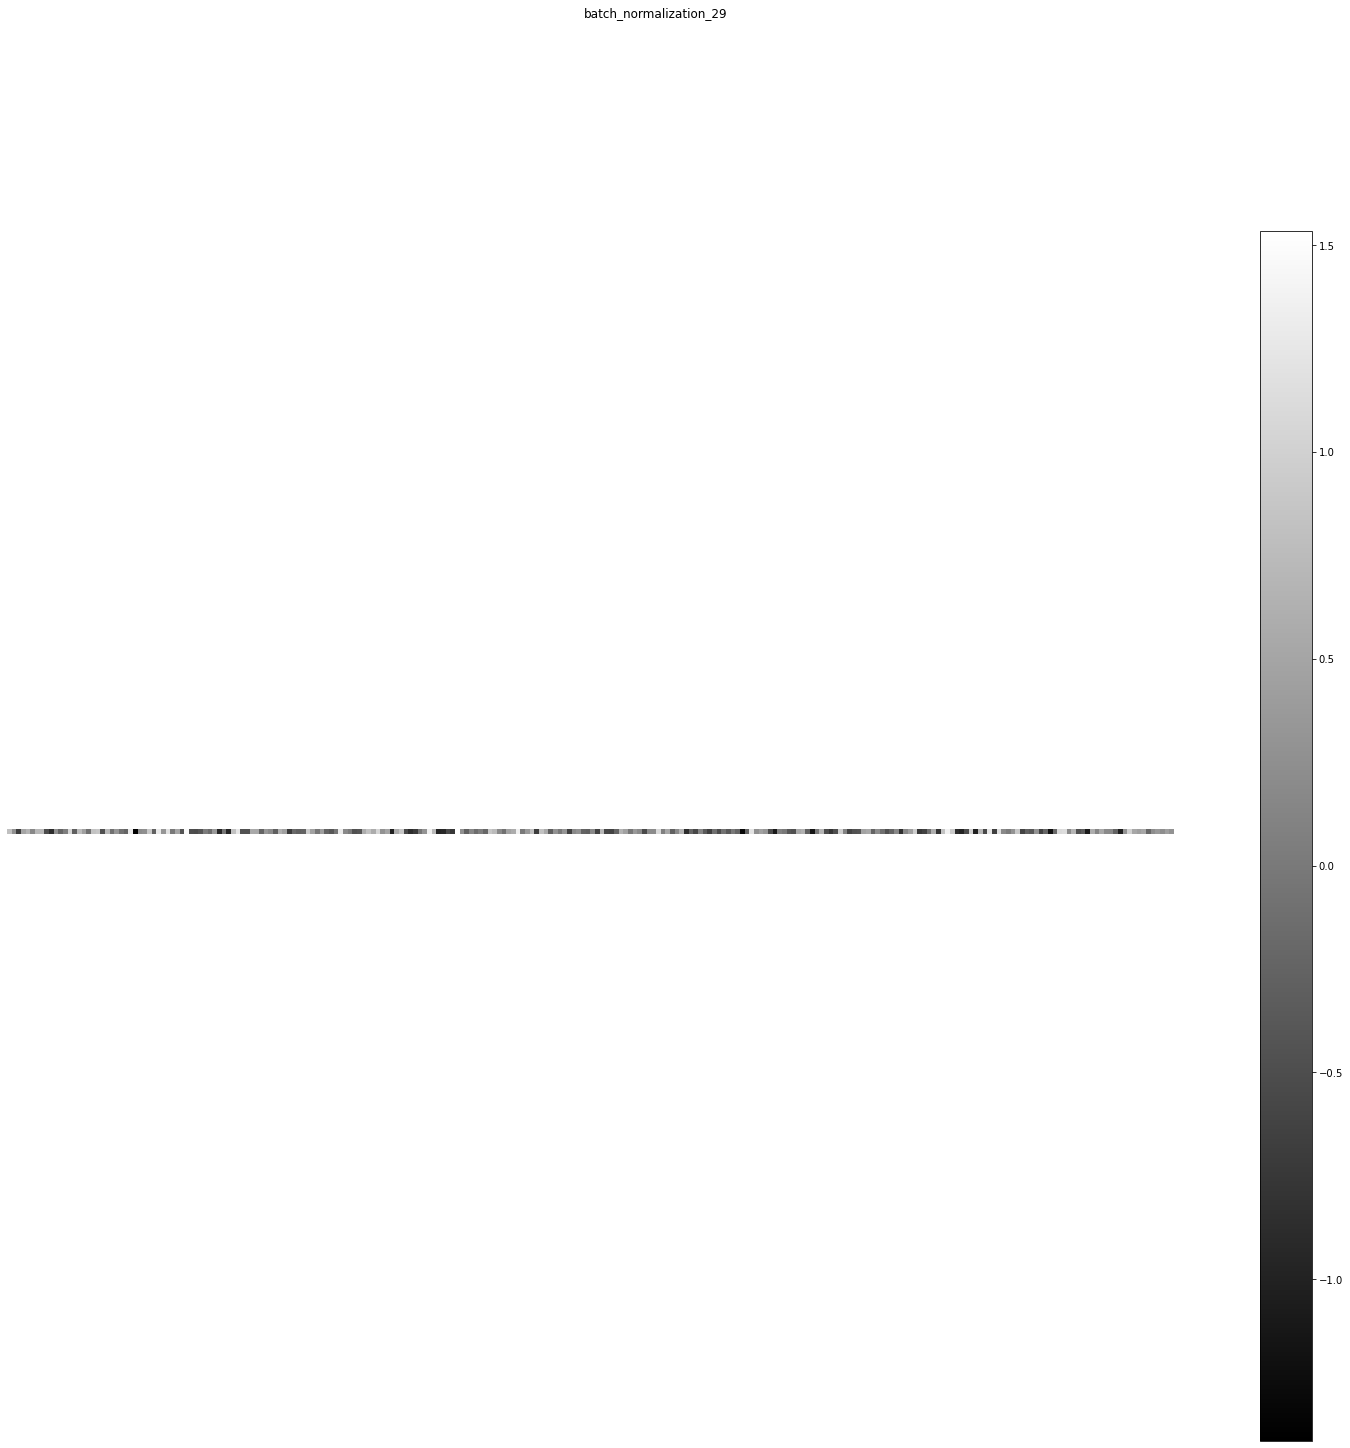

activation_26 (1, 250) 


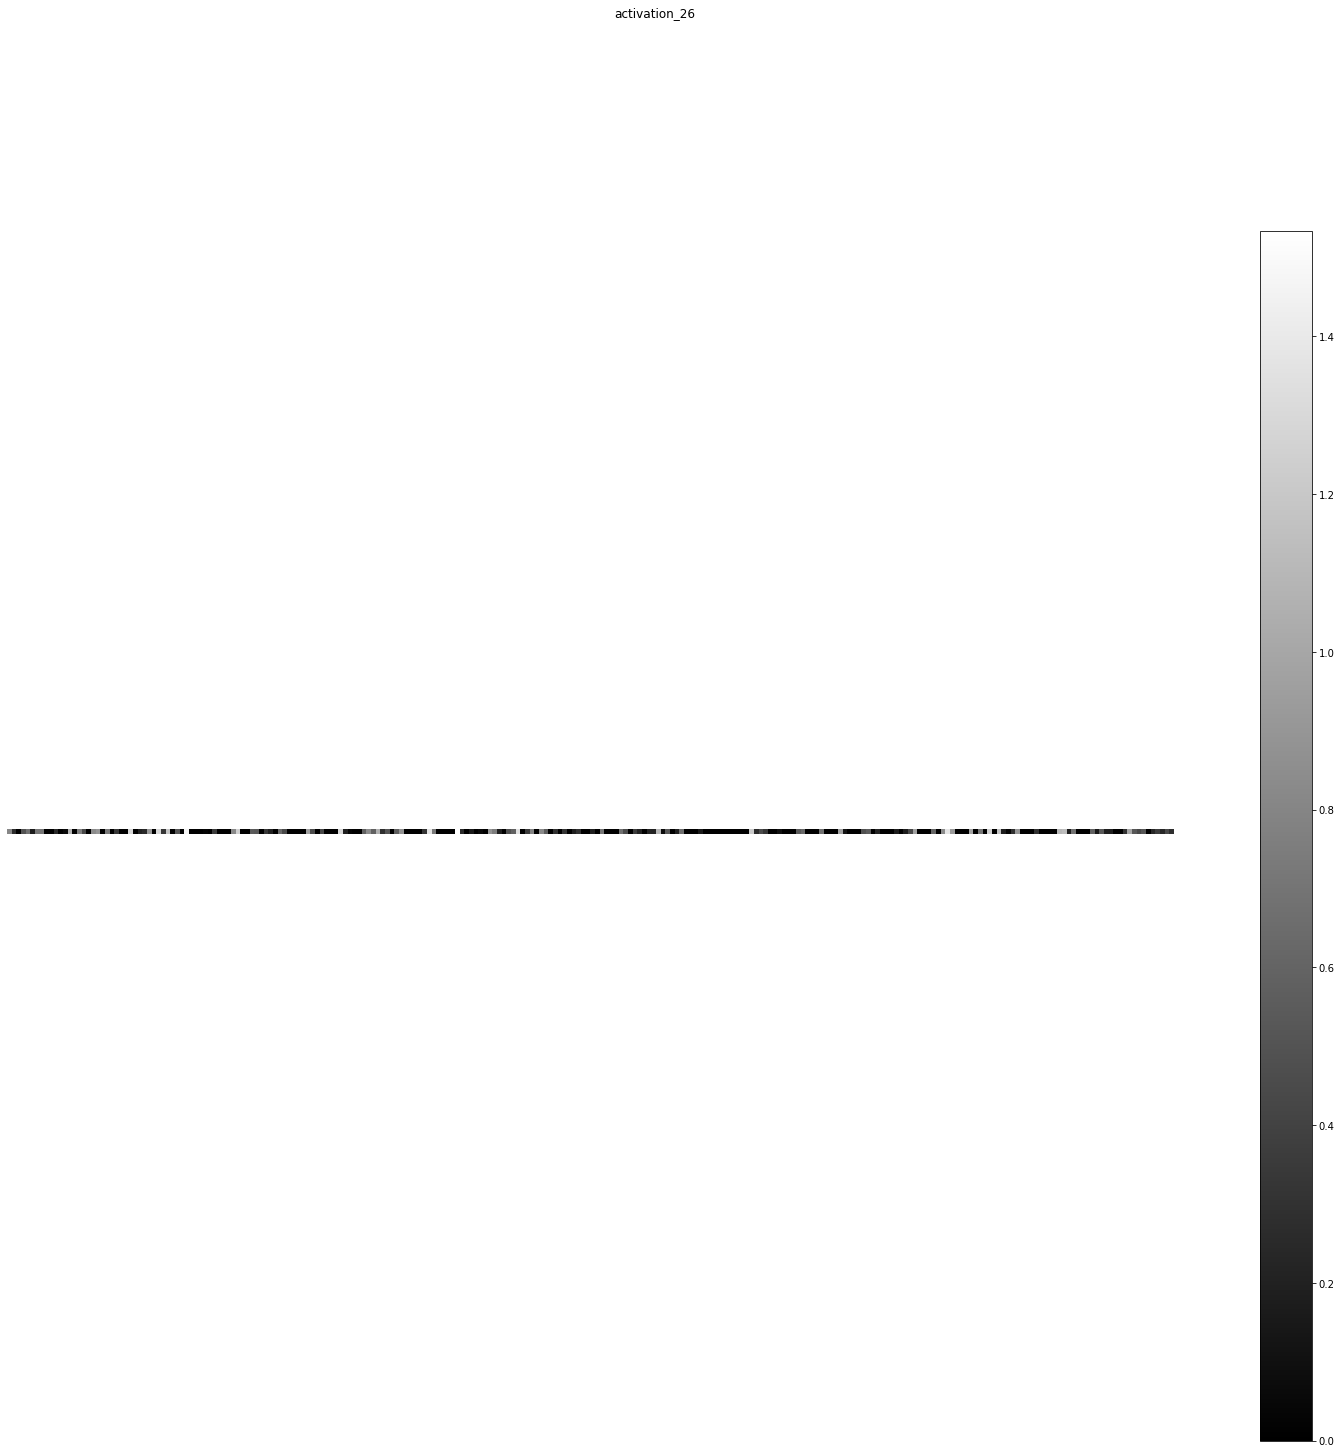

dropout_14 (1, 250) 


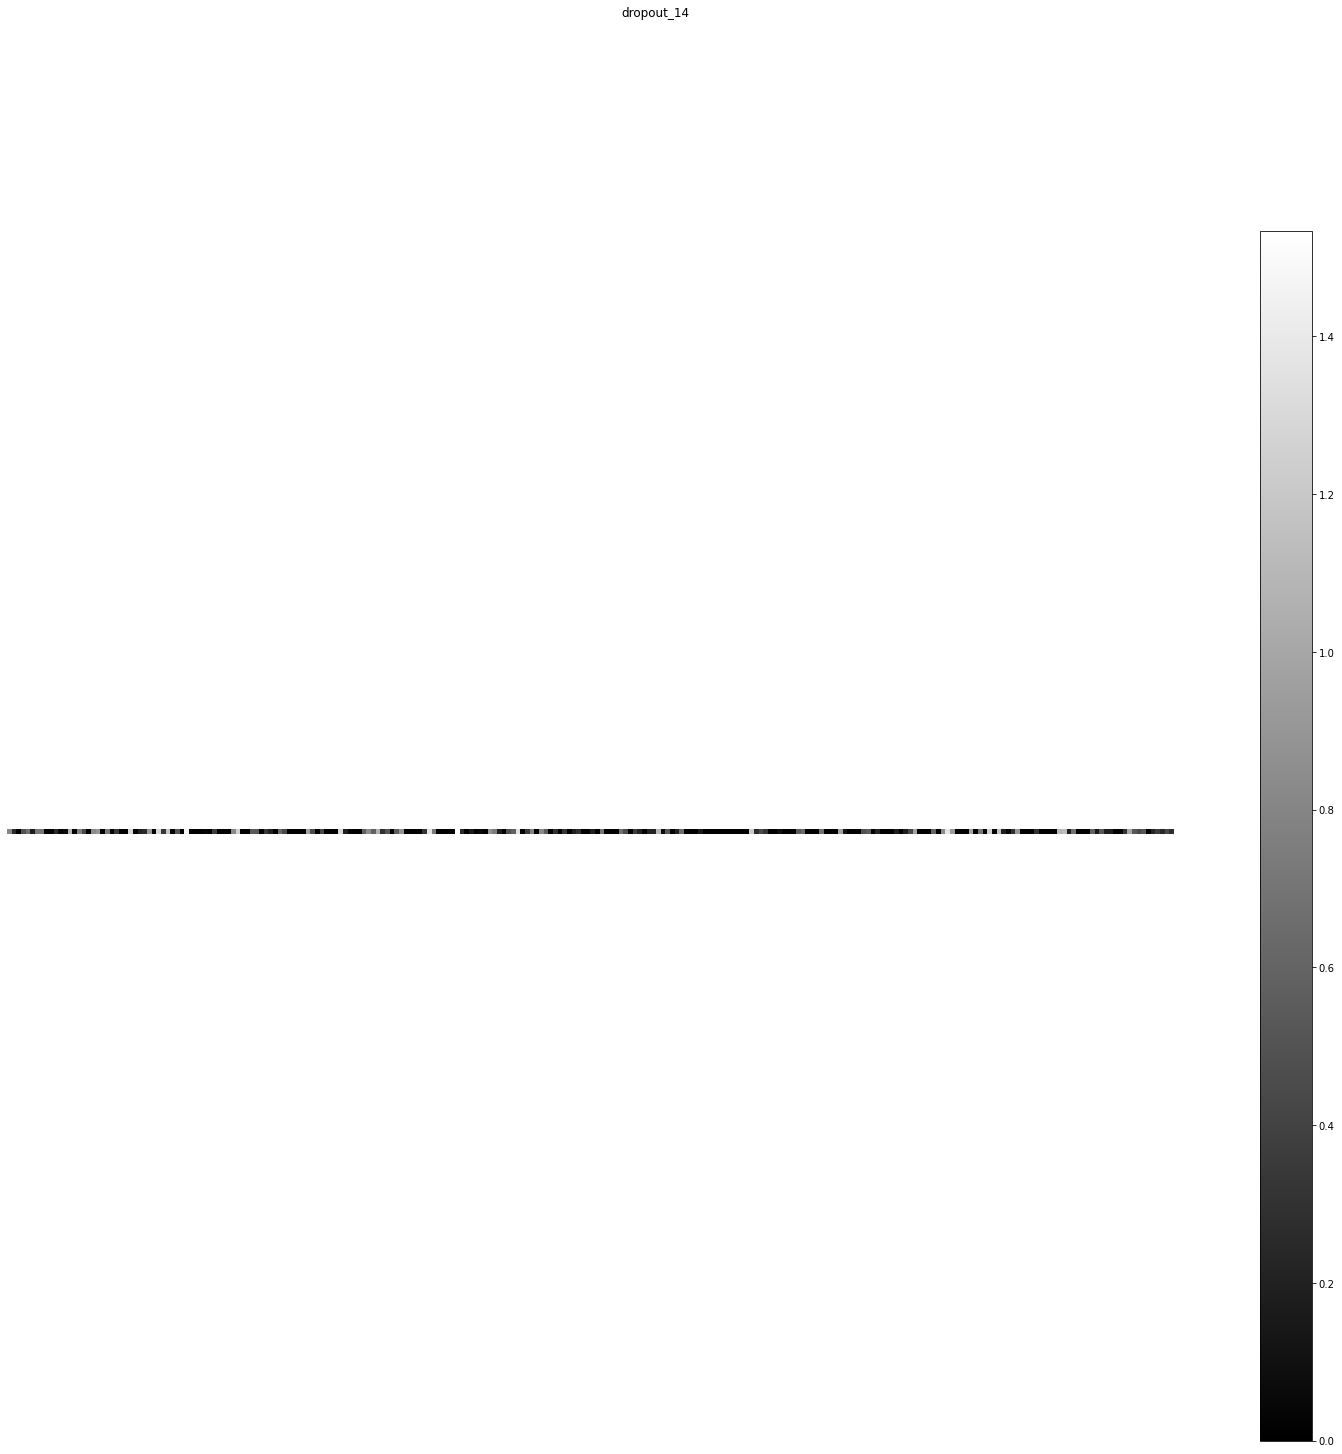

dense_28 (1, 250) 


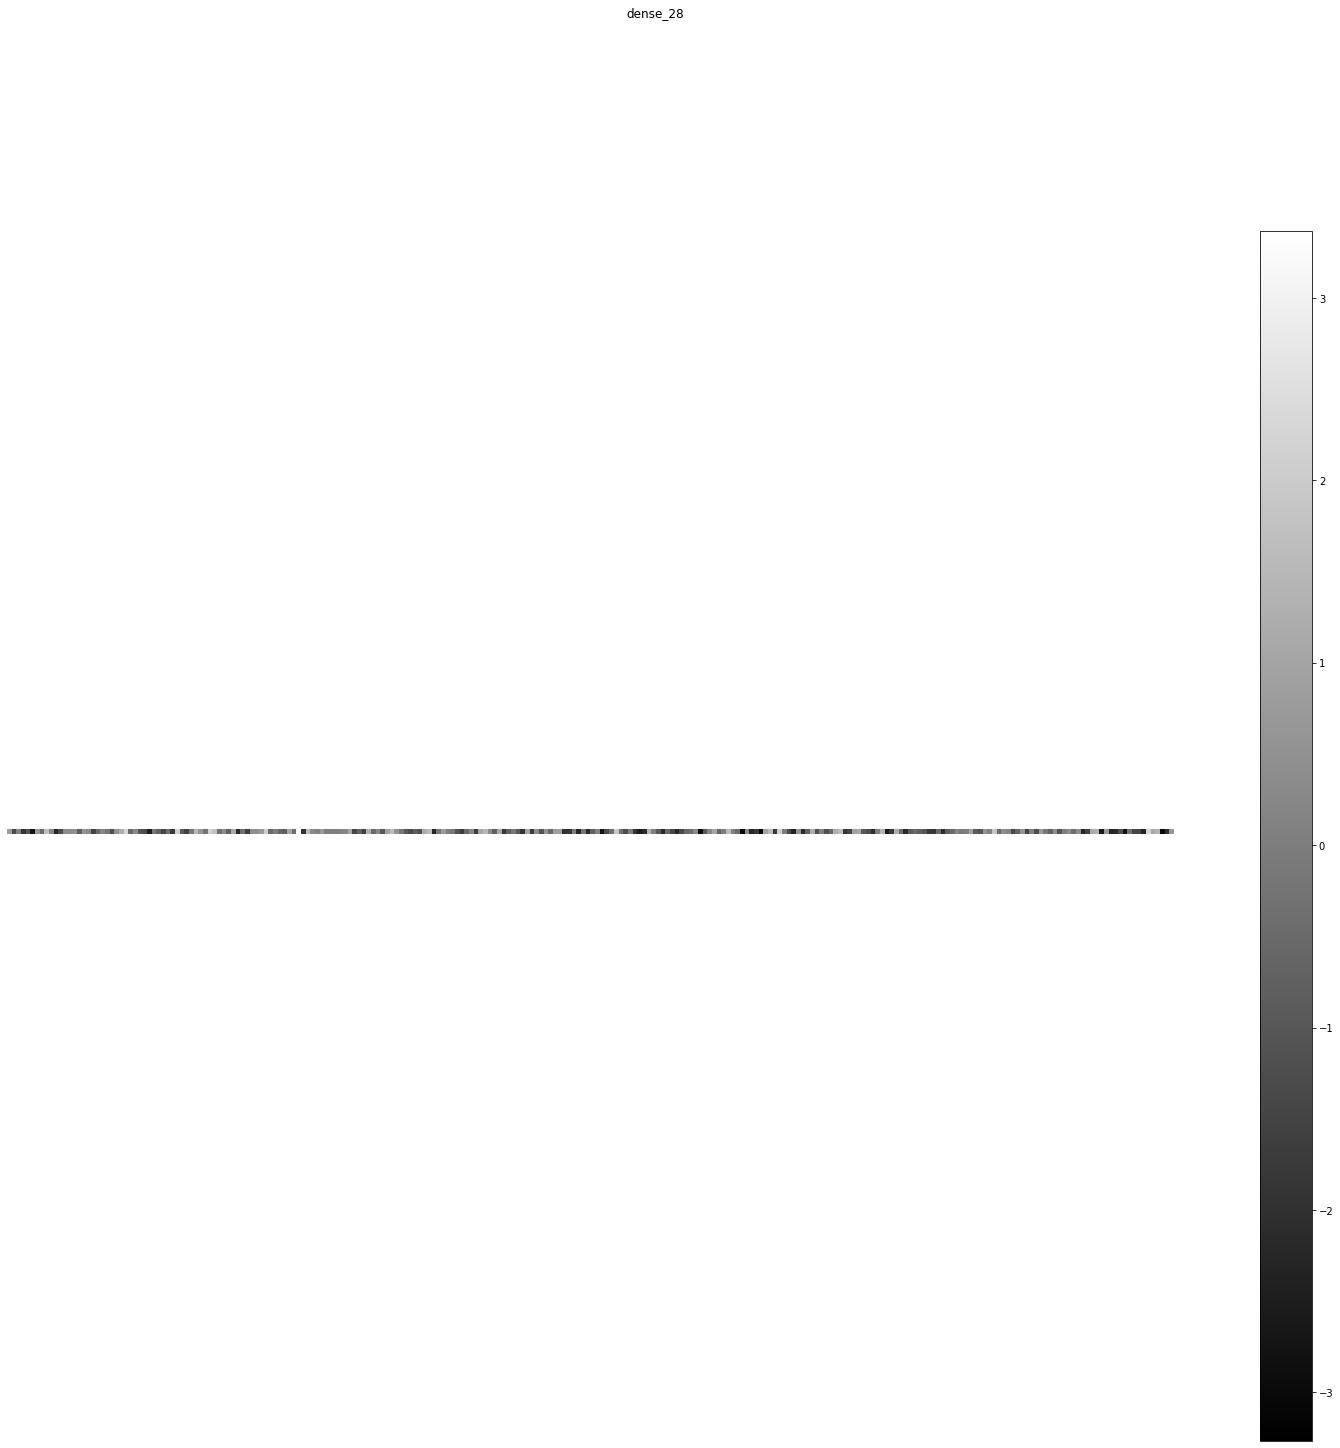

batch_normalization_30 (1, 250) 


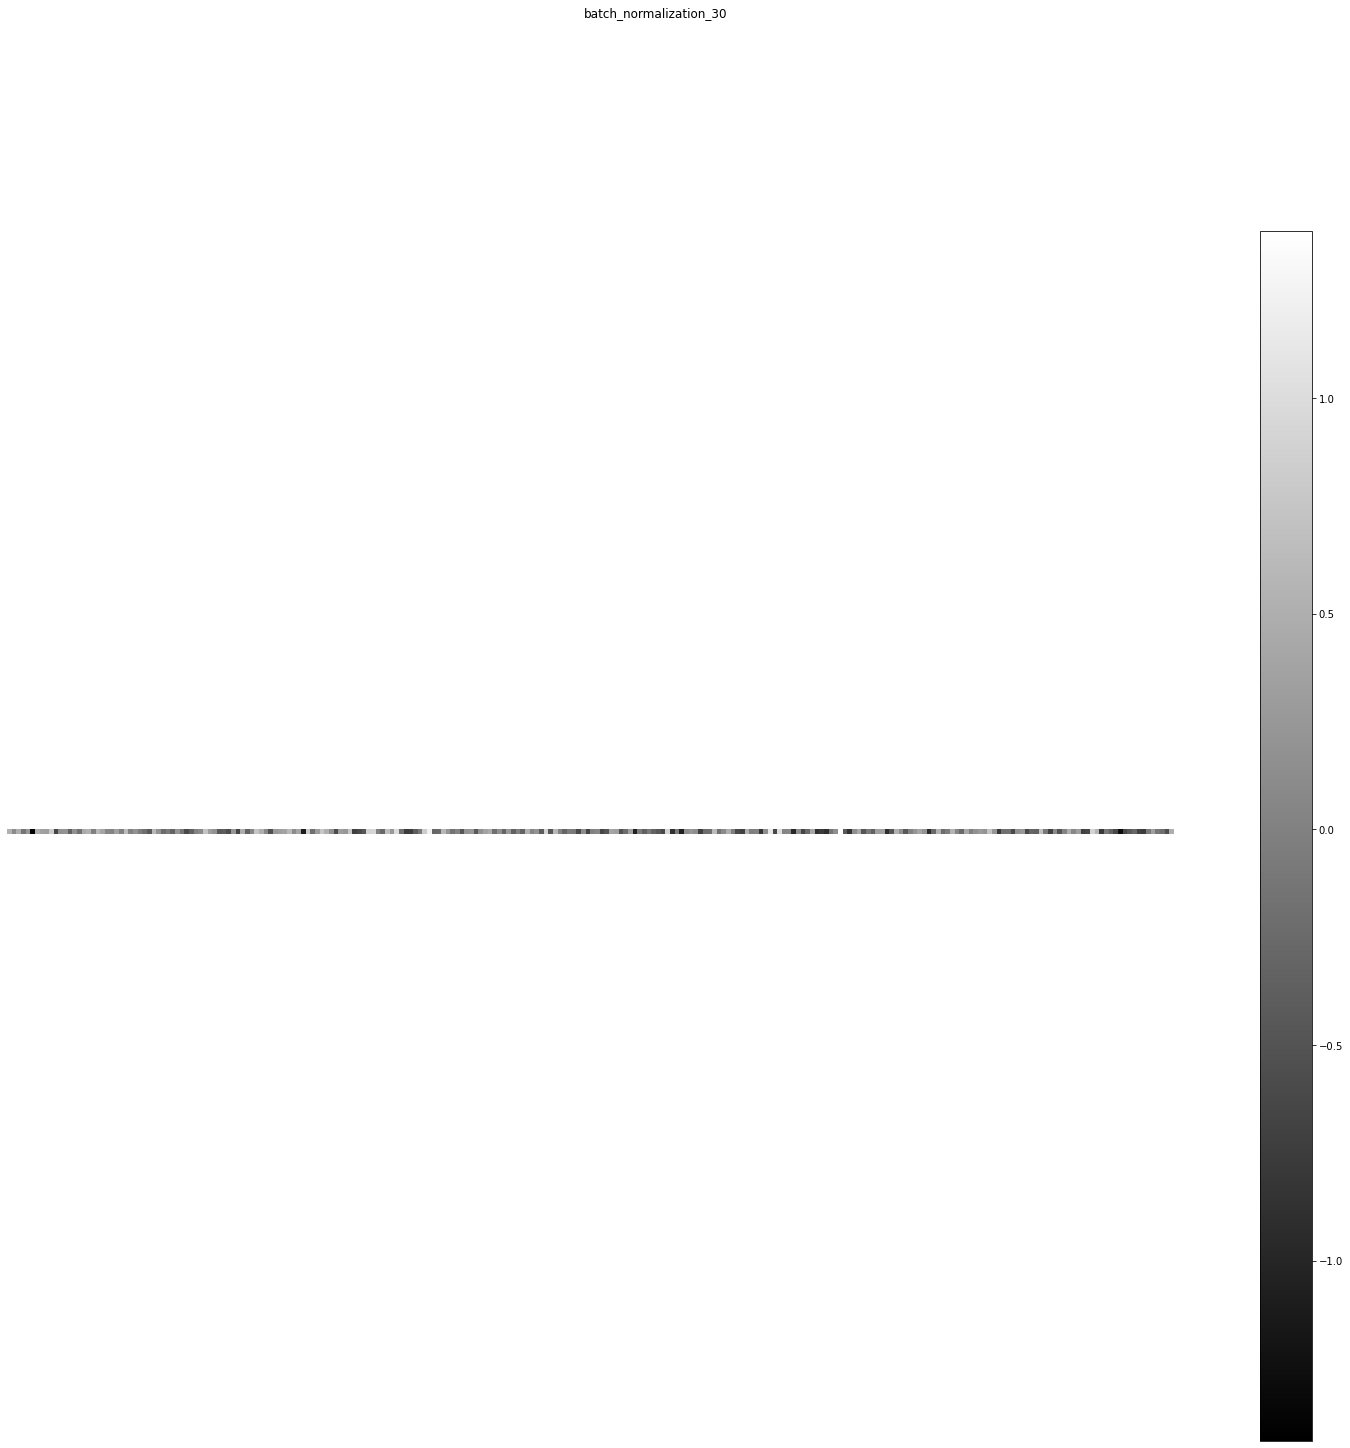

activation_27 (1, 250) 


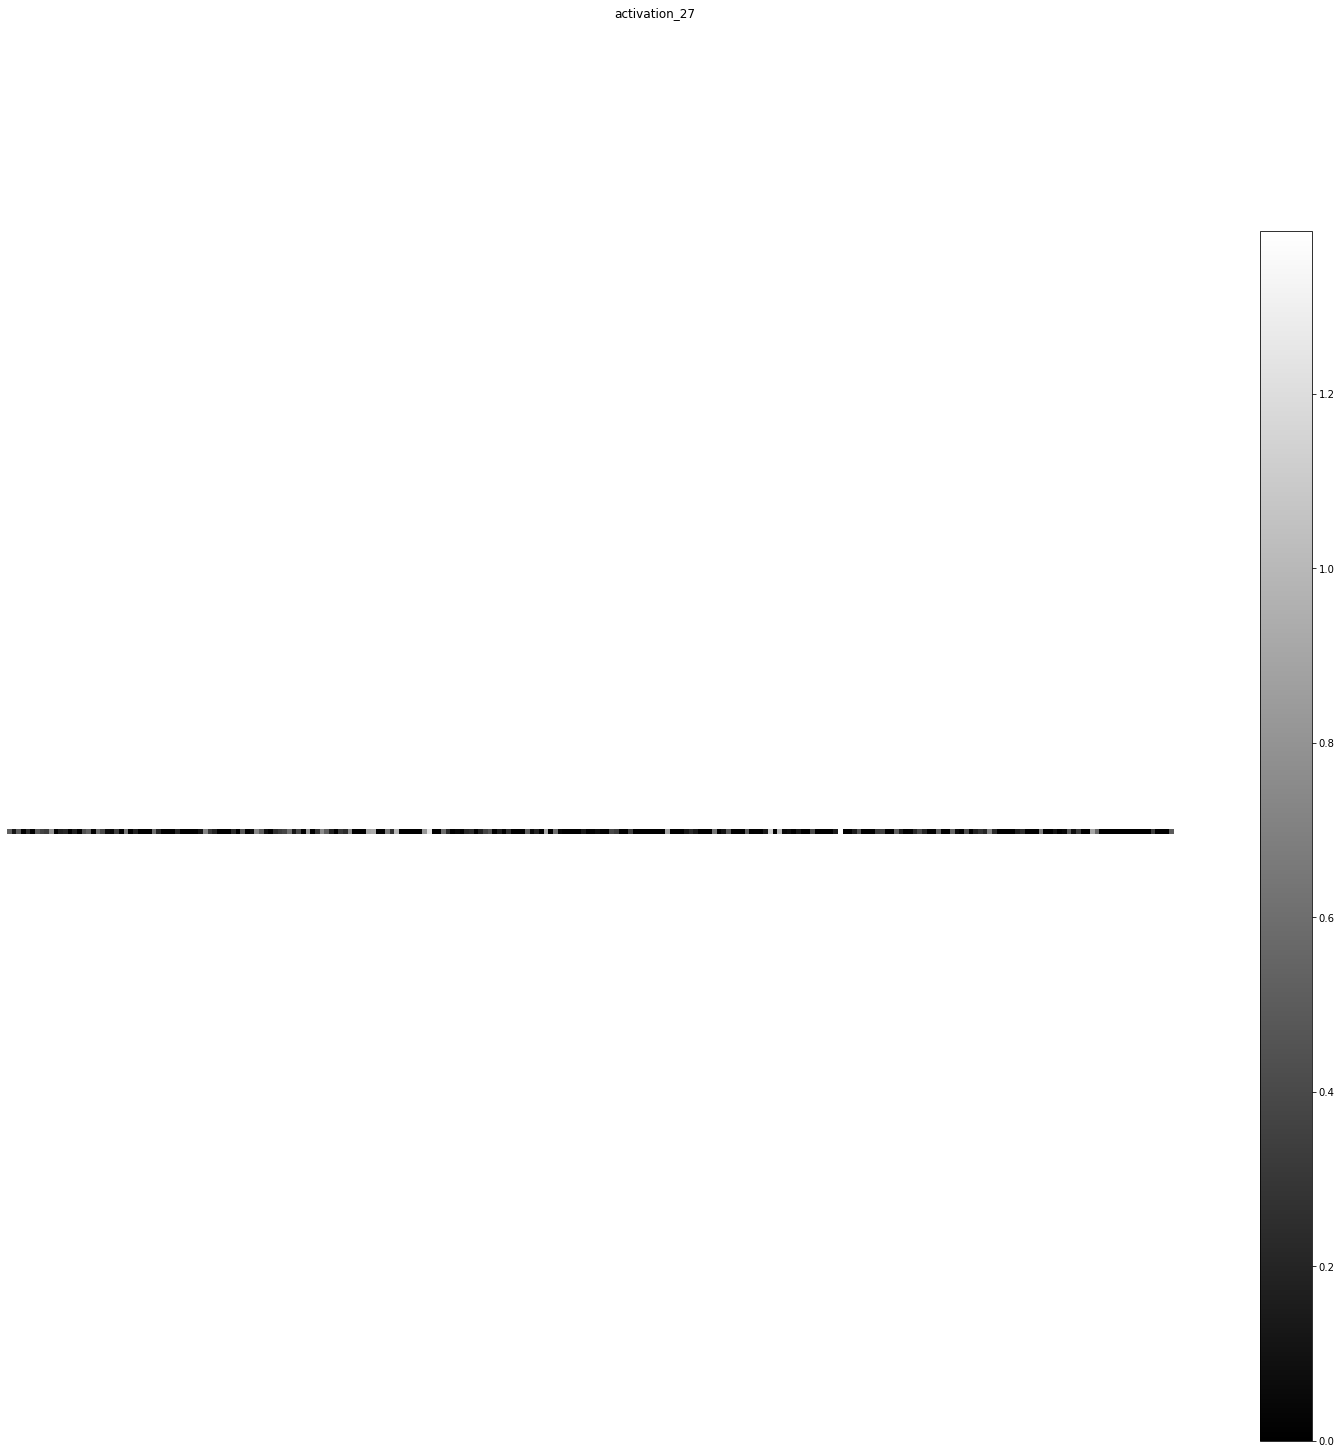

dropout_15 (1, 250) 


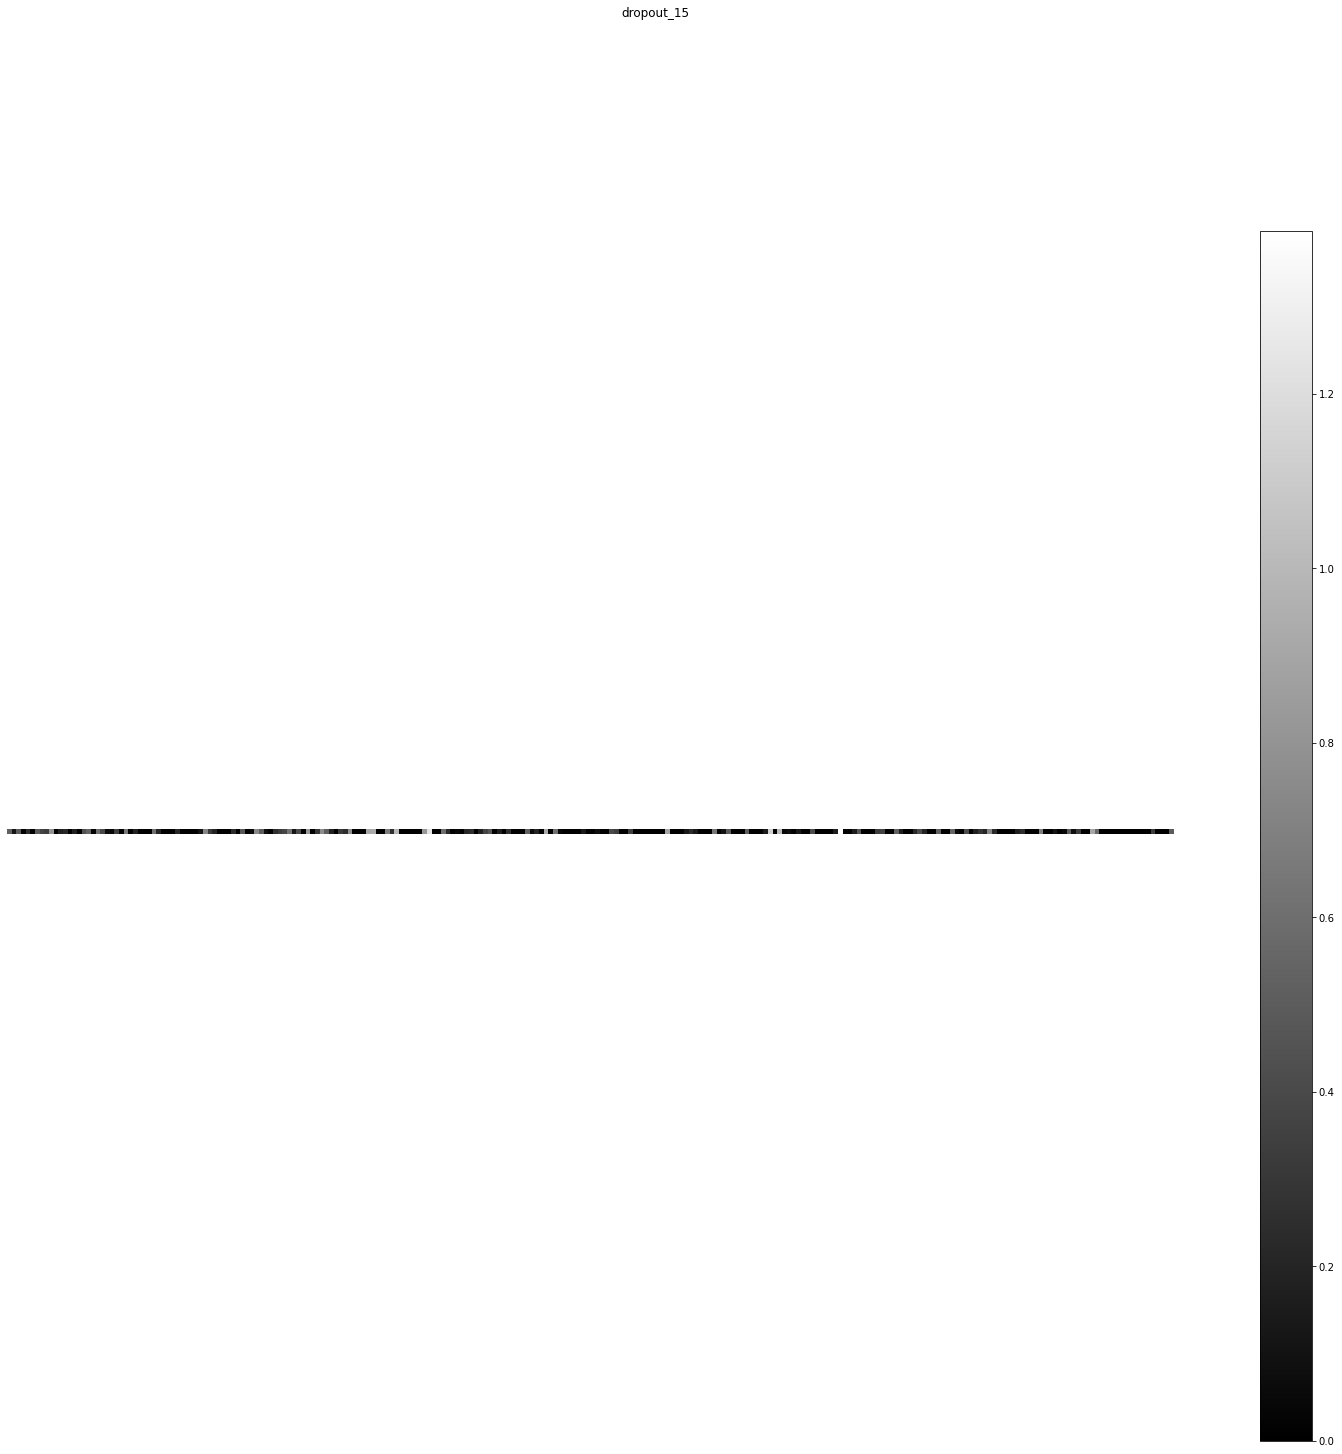

dense_29 (1, 64) 


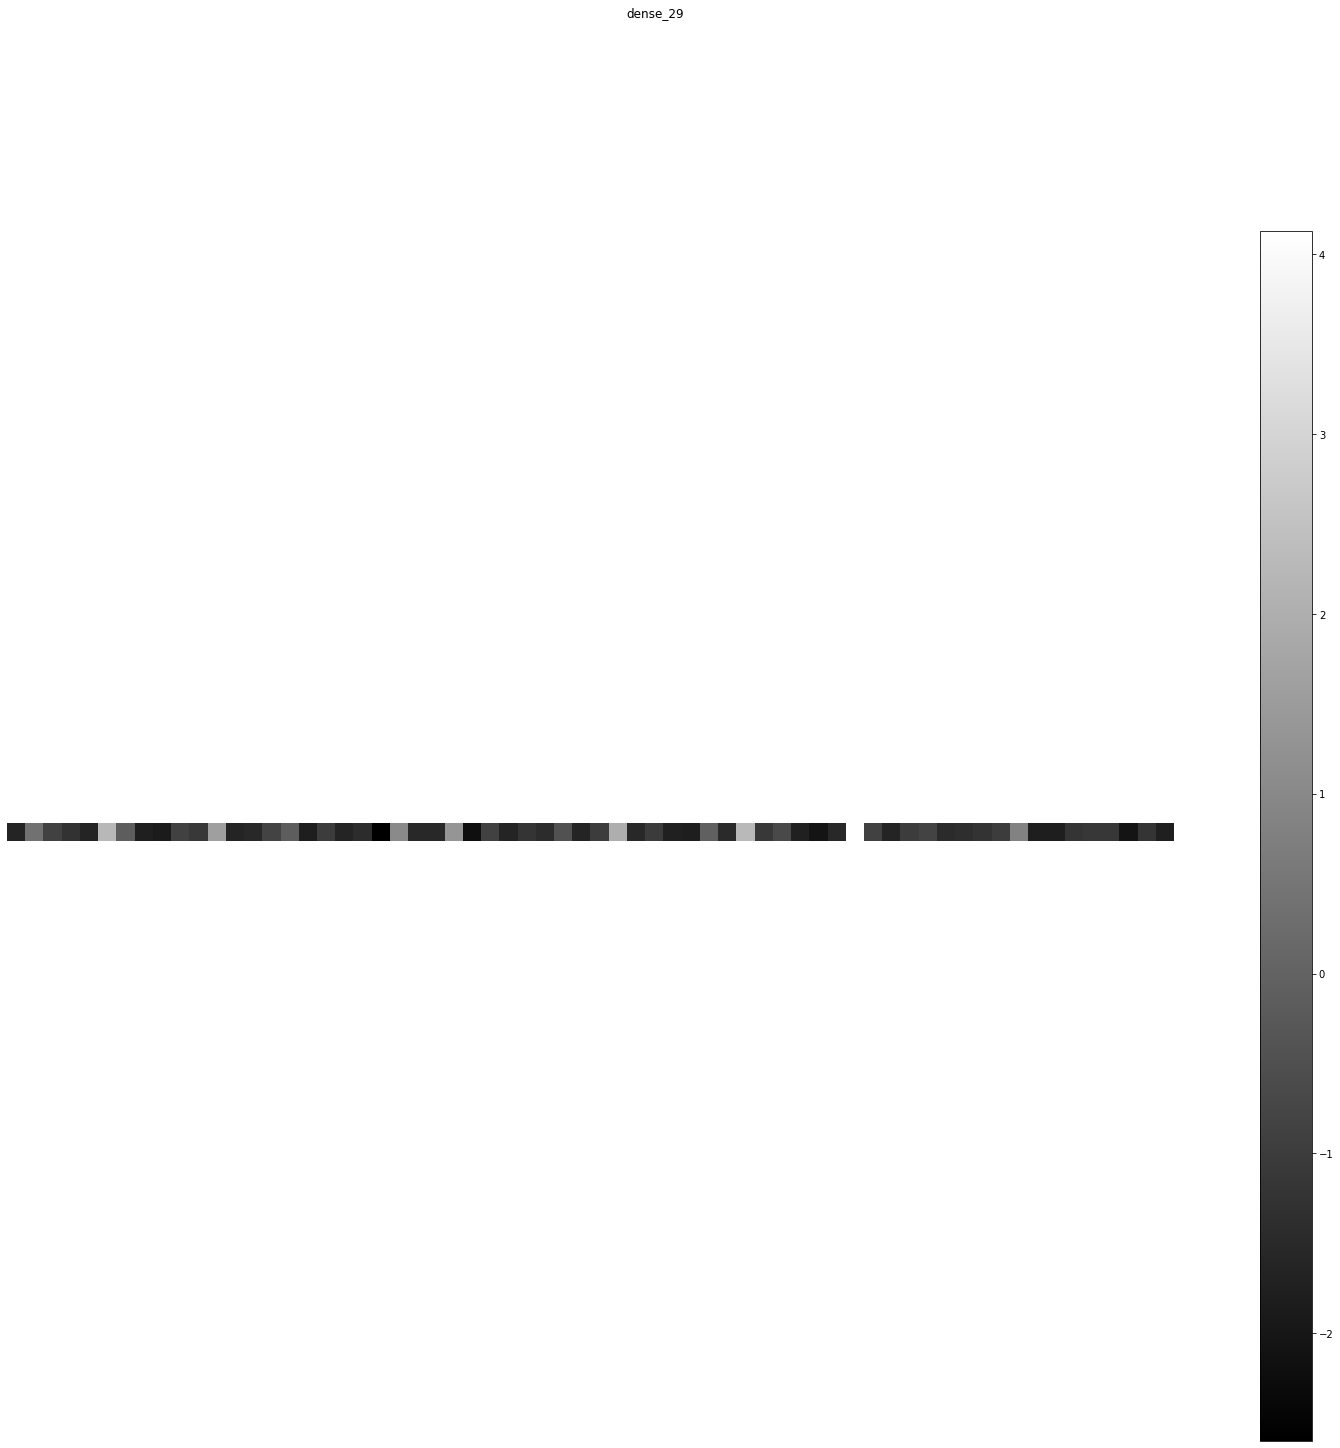

activation_28 (1, 64) 


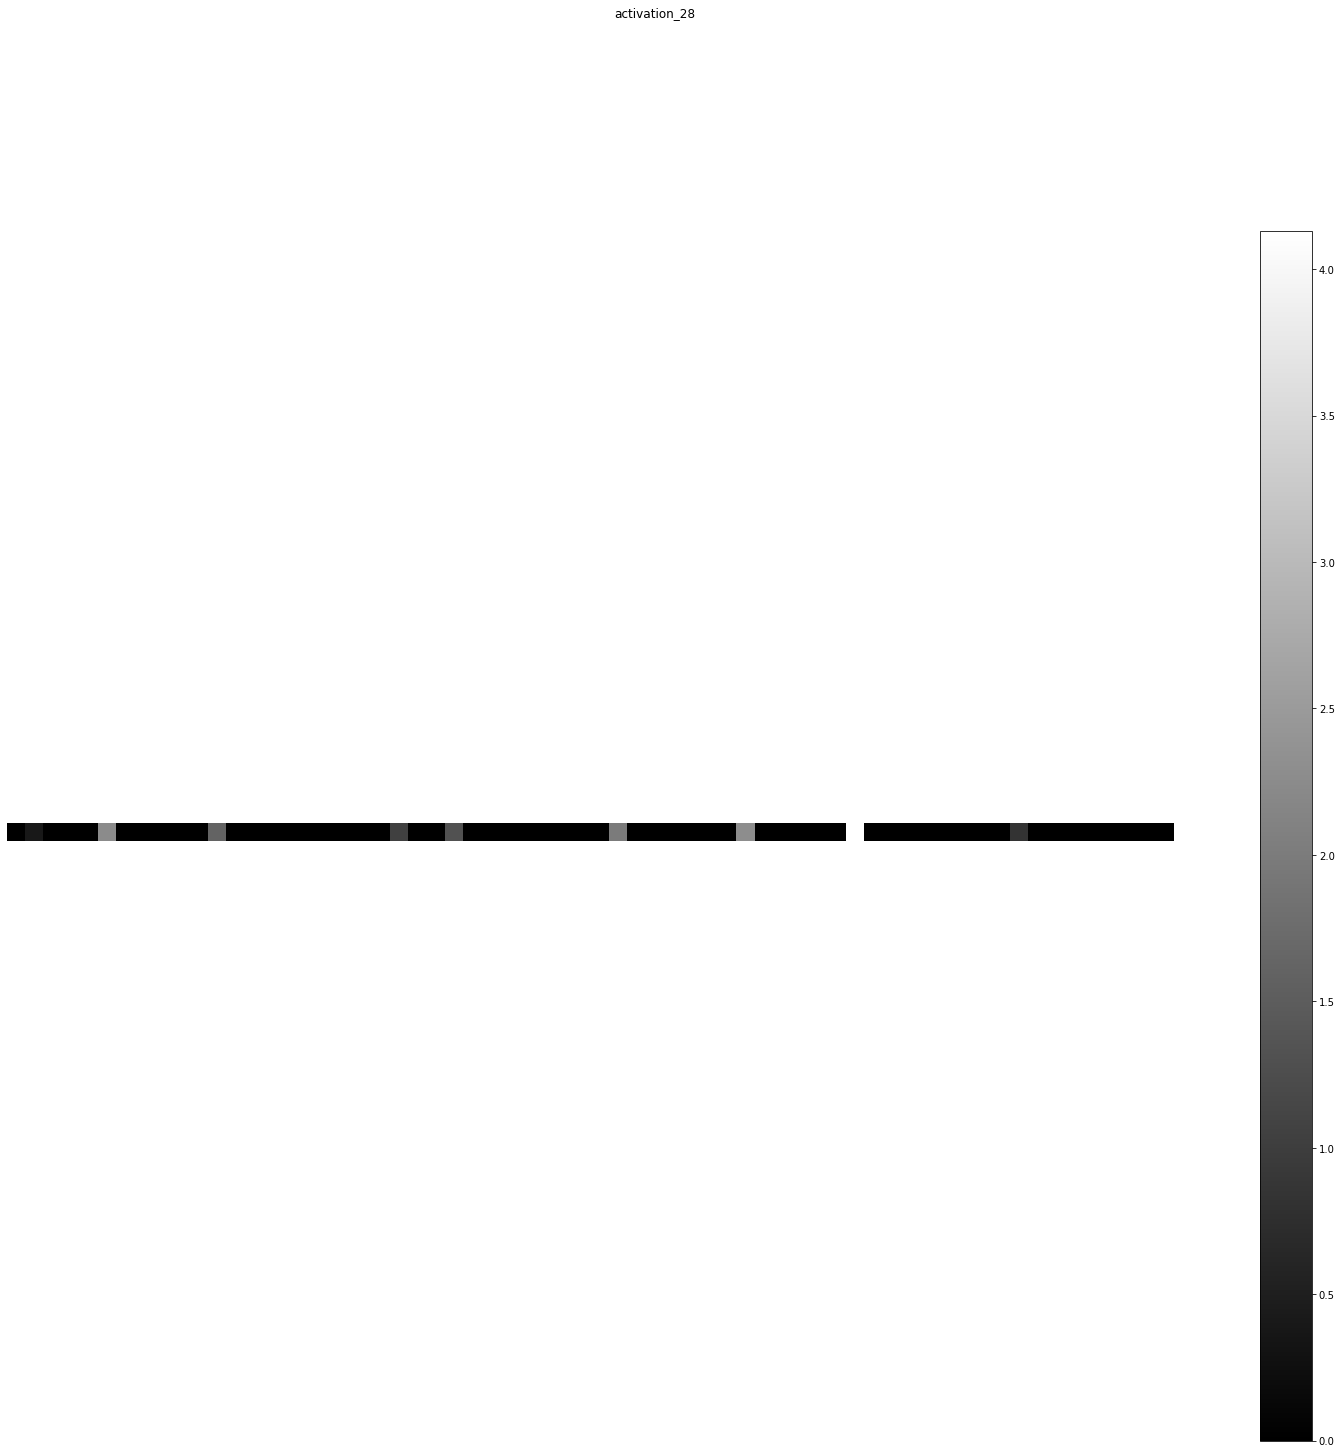

dense_30 (1, 7) 


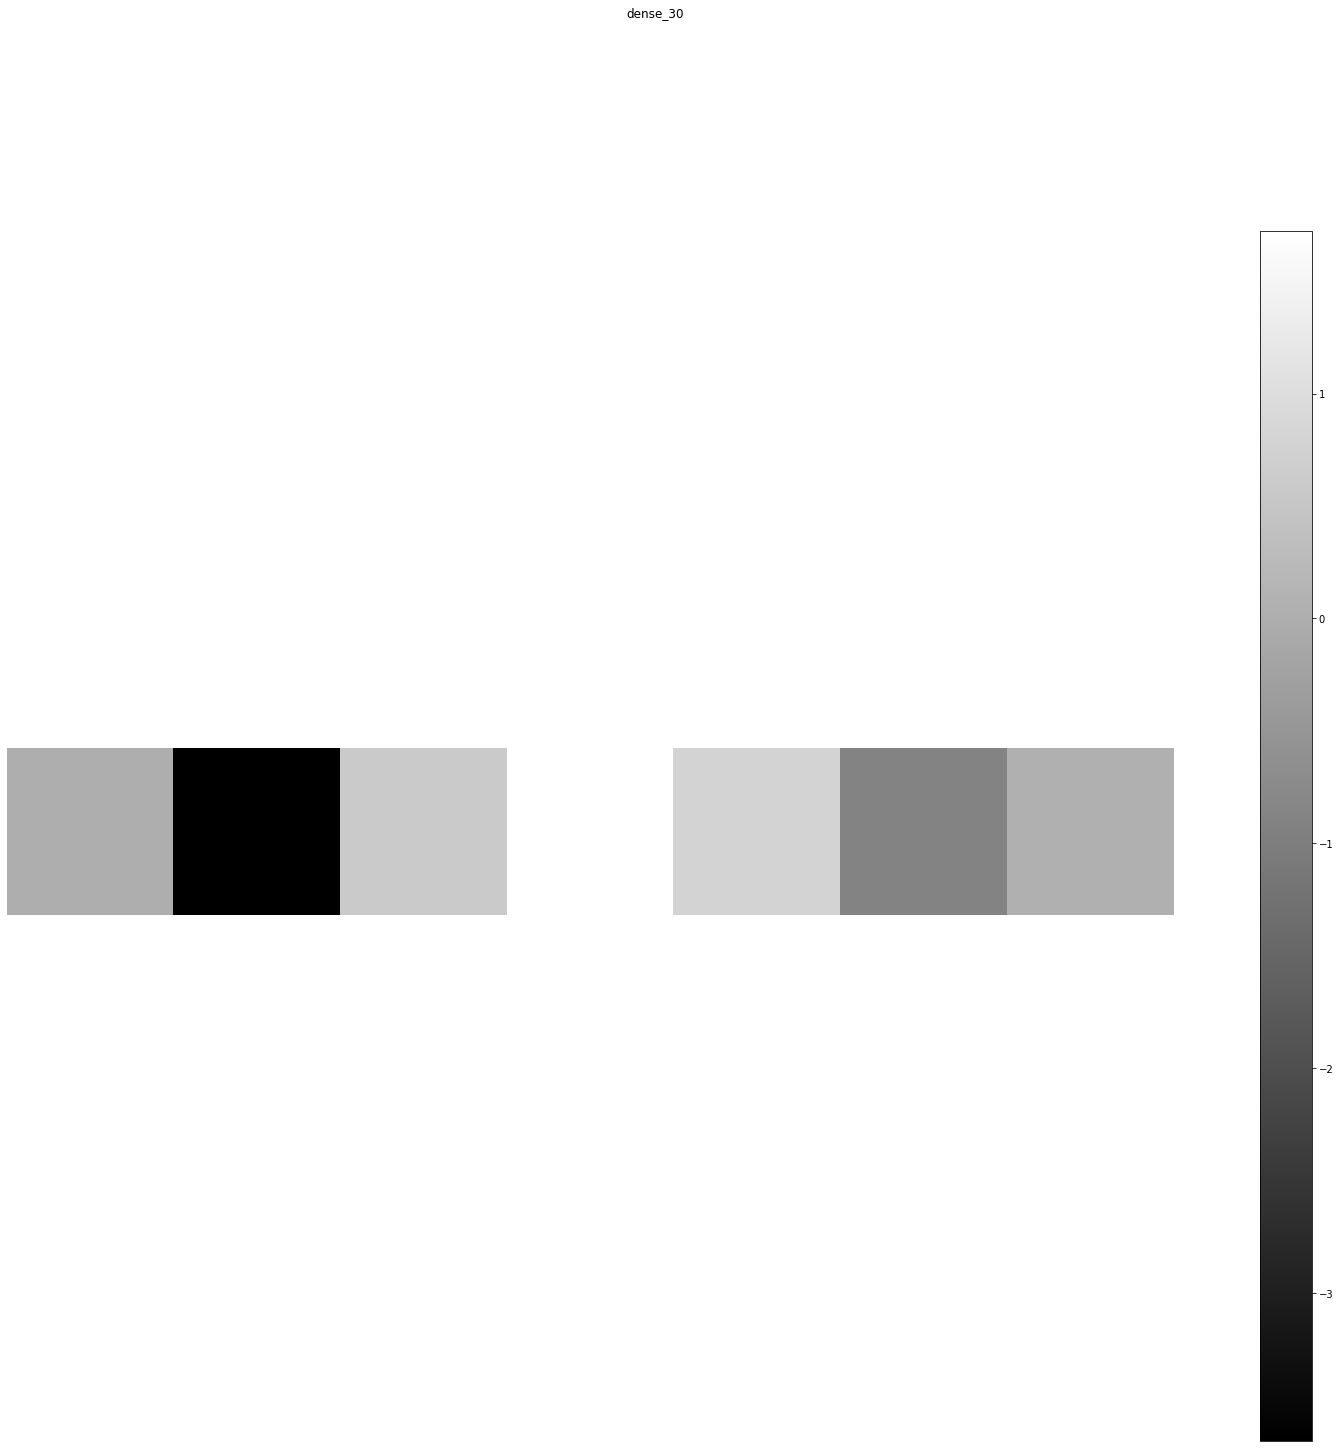

activation_29 (1, 7) 


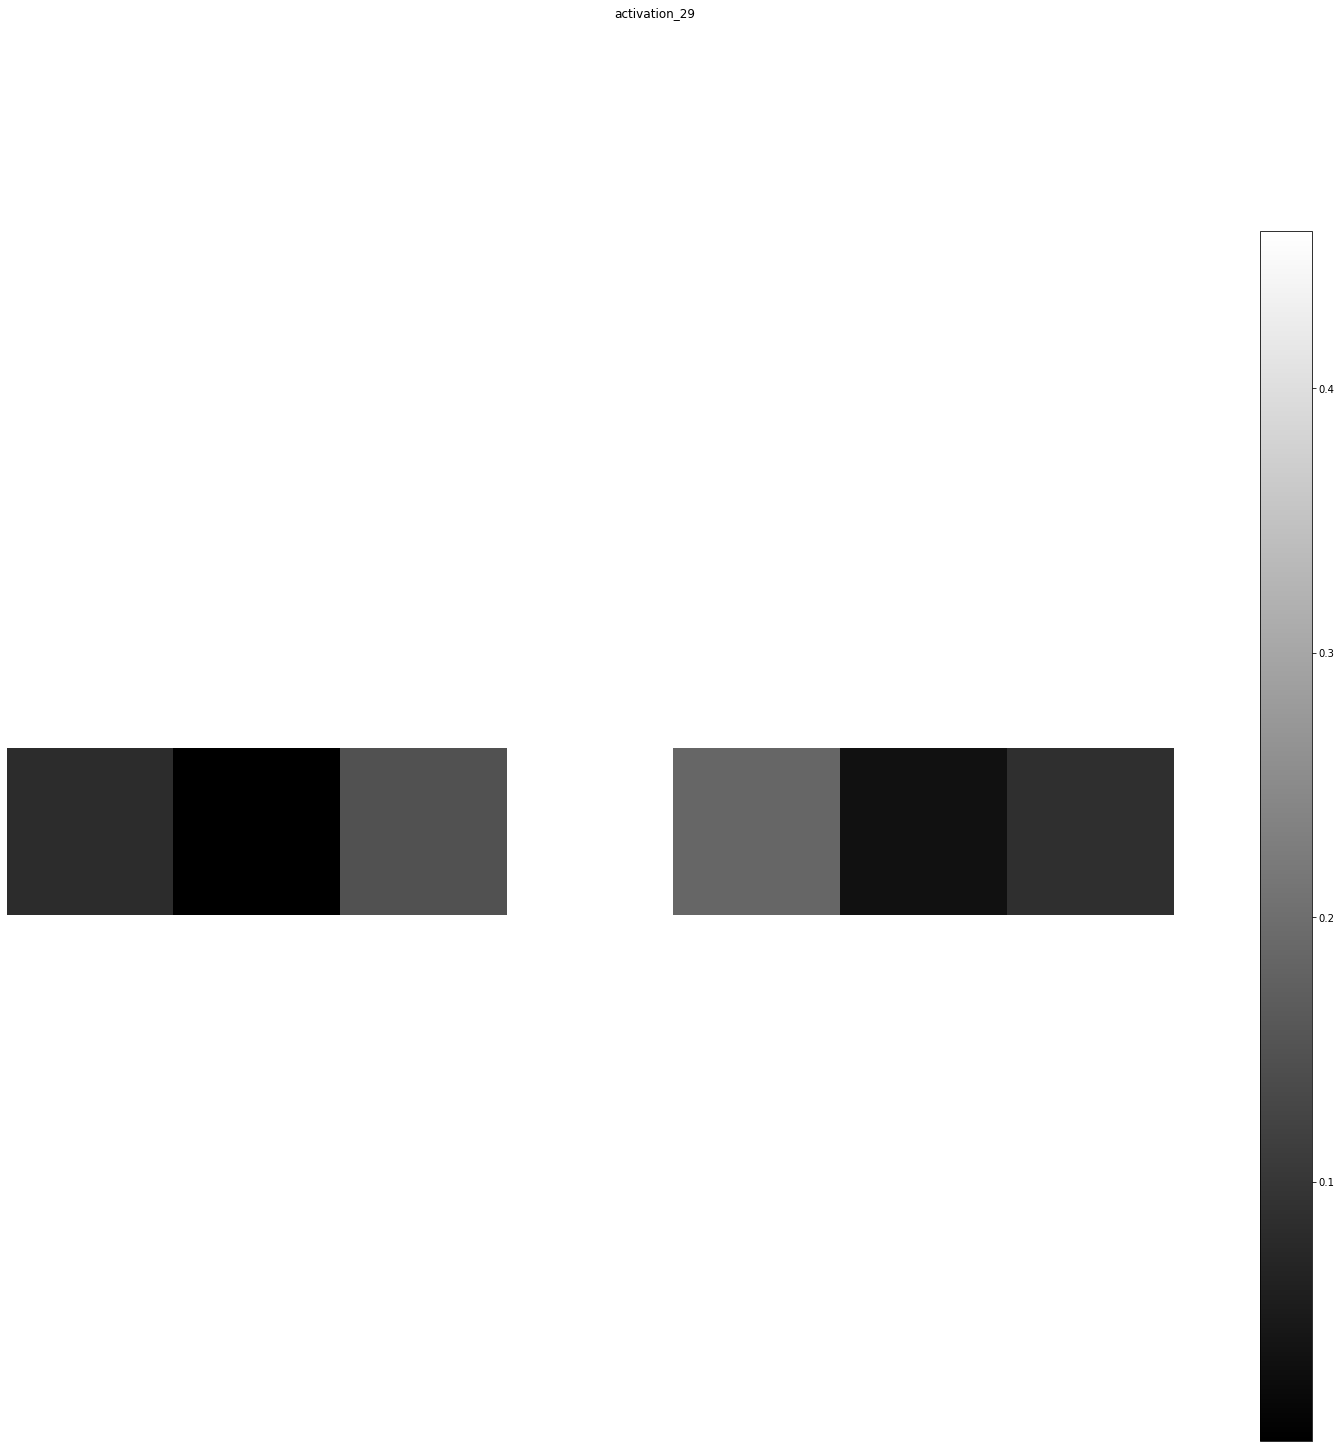

In [44]:
keract.display_activations(activations,cmap='gray')


conv2d_44_input (1, 48, 48, 1) 


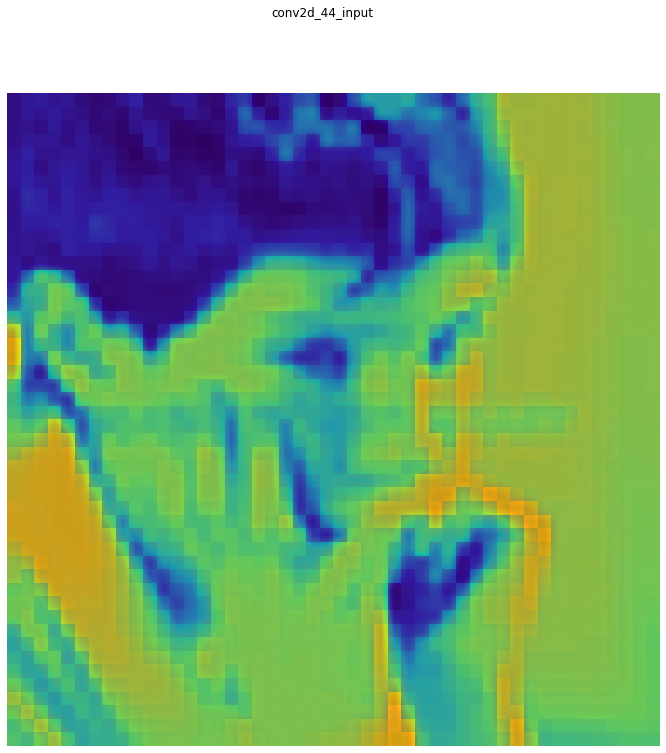

conv2d_44 (1, 48, 48, 64) 


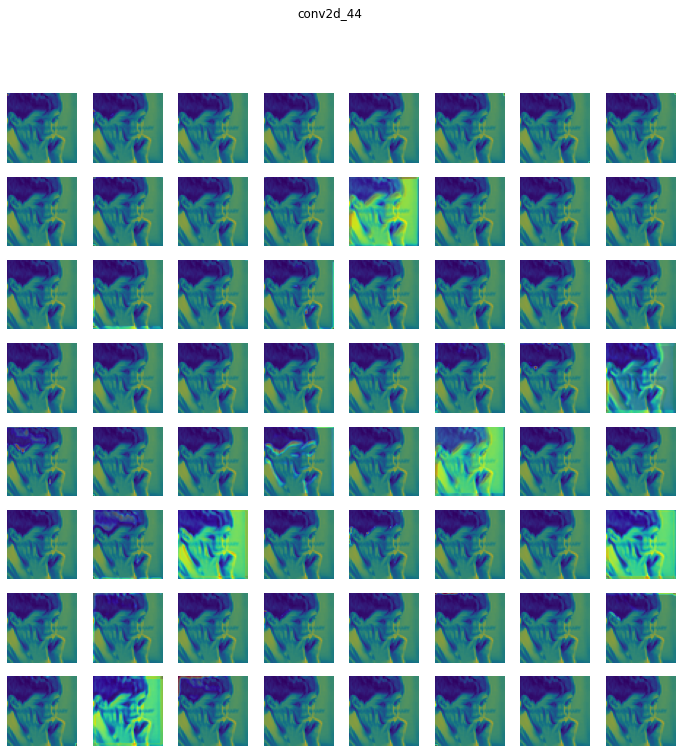

conv2d_45 (1, 48, 48, 64) 


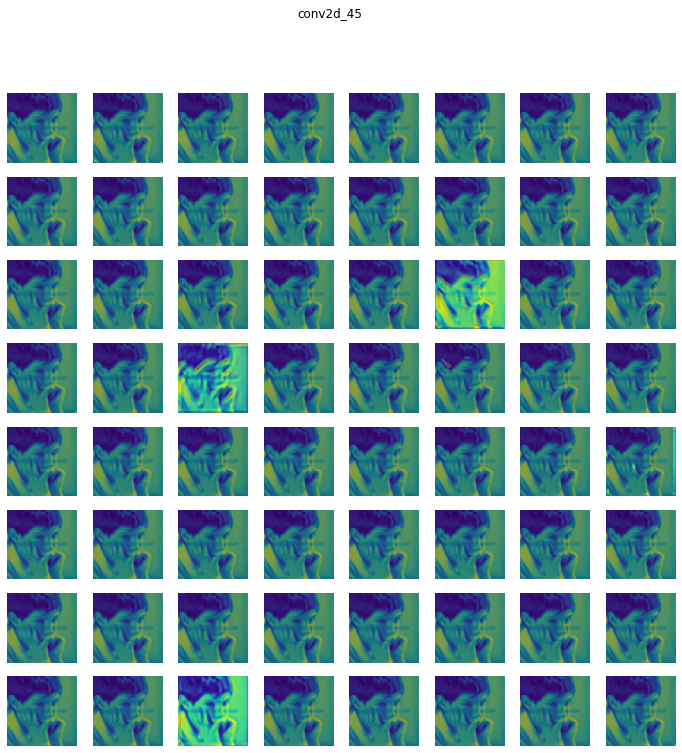

conv2d_46 (1, 48, 48, 64) 


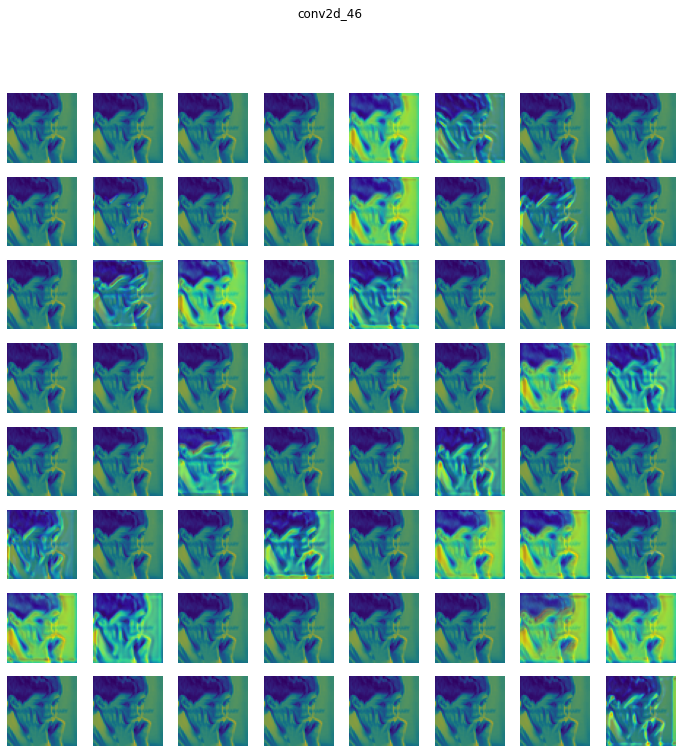

batch_normalization_25 (1, 48, 48, 64) 


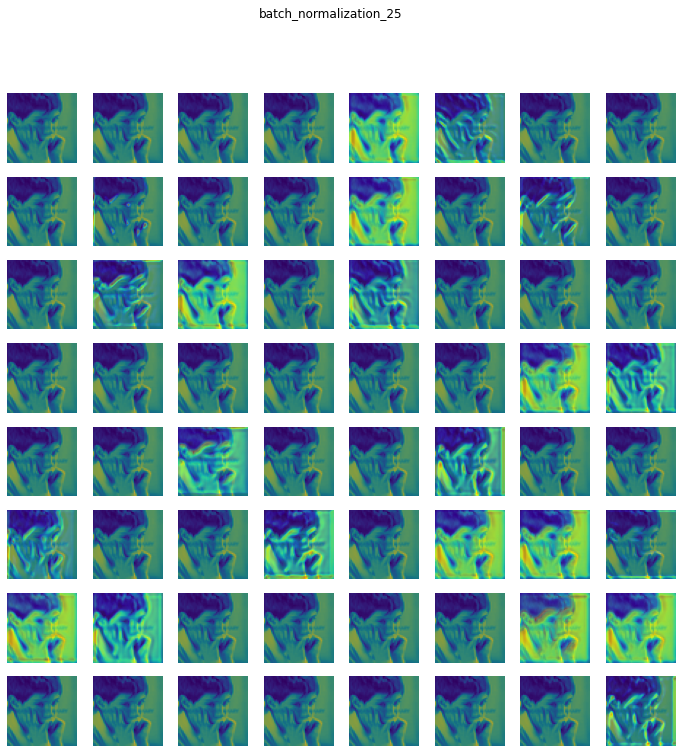

max_pooling2d_29 (1, 24, 24, 64) 


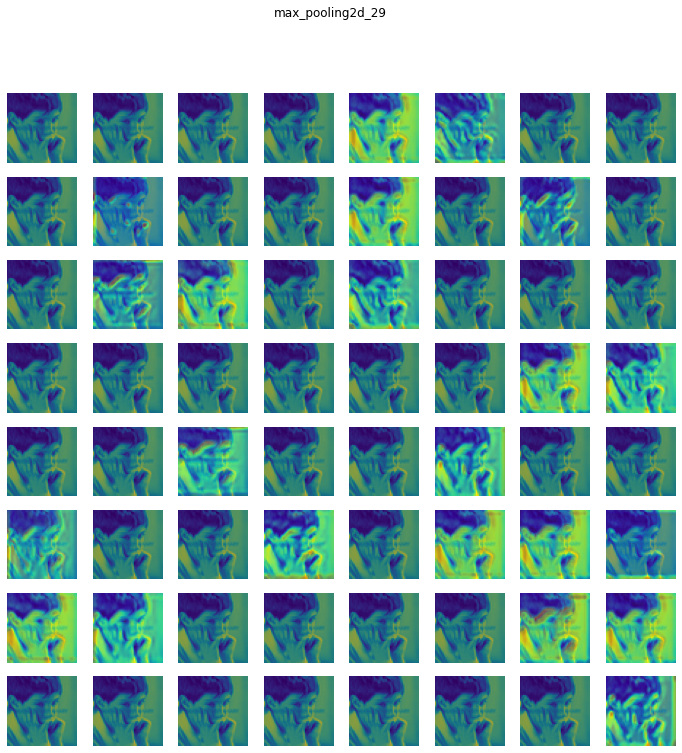

conv2d_47 (1, 24, 24, 128) 


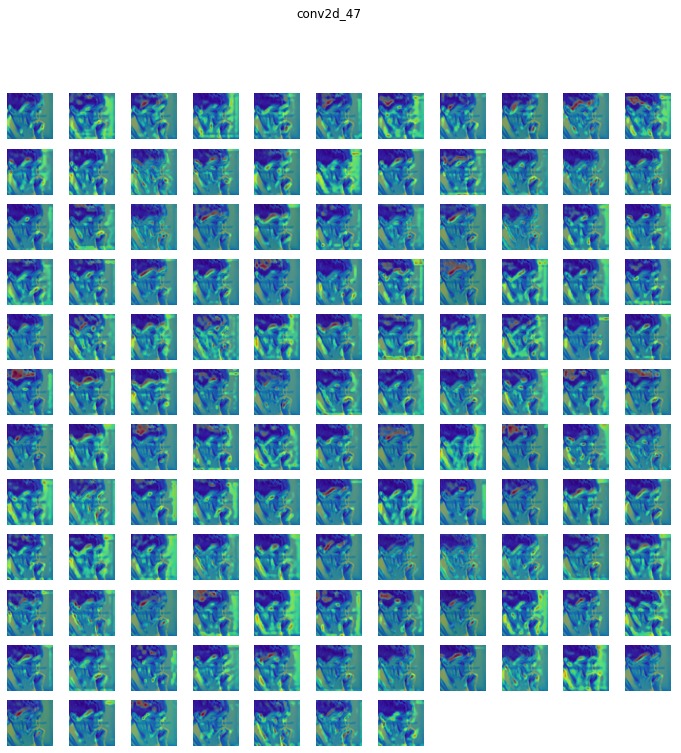

conv2d_48 (1, 24, 24, 128) 


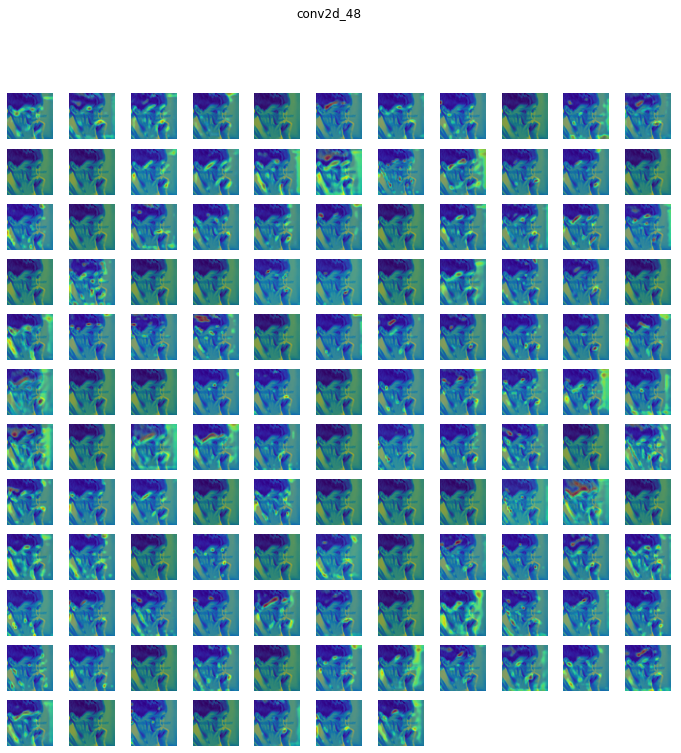

batch_normalization_26 (1, 24, 24, 128) 


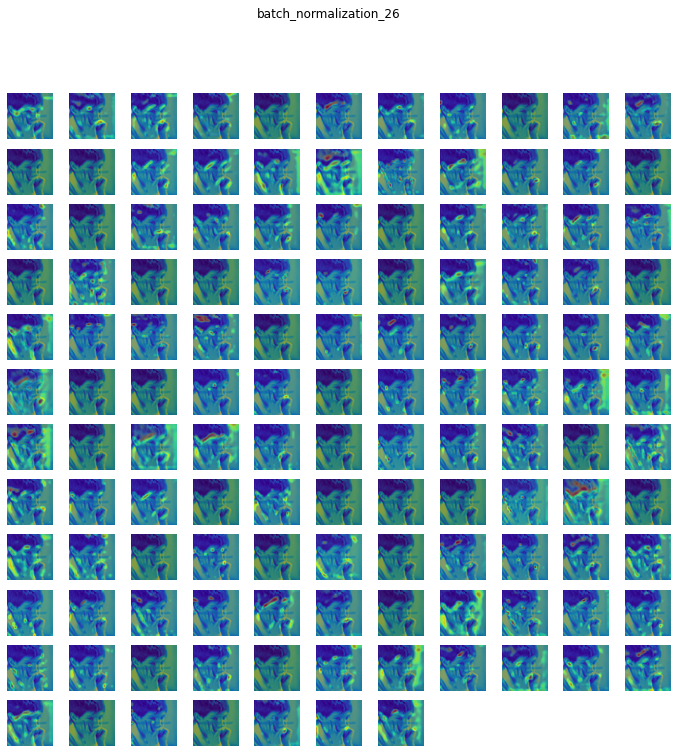

max_pooling2d_30 (1, 12, 12, 128) 


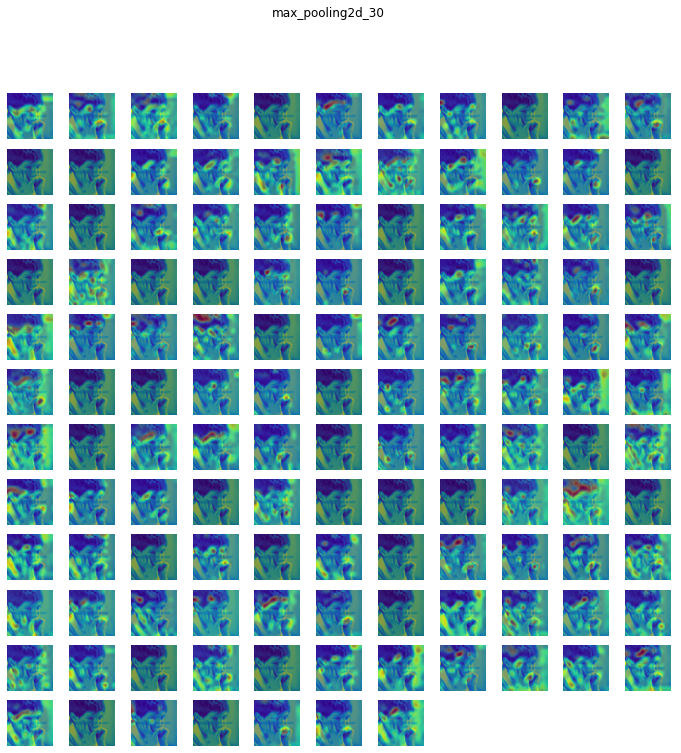

conv2d_49 (1, 12, 12, 256) 


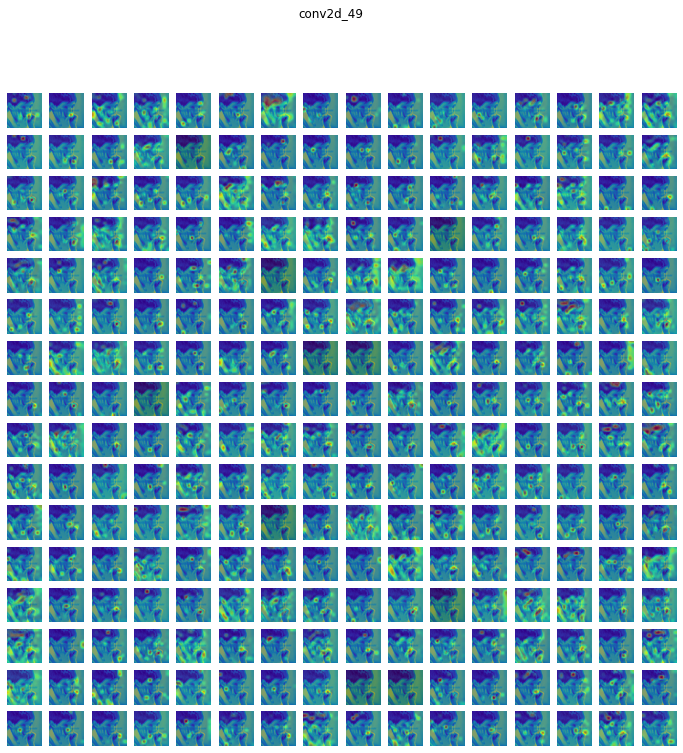

batch_normalization_27 (1, 12, 12, 256) 


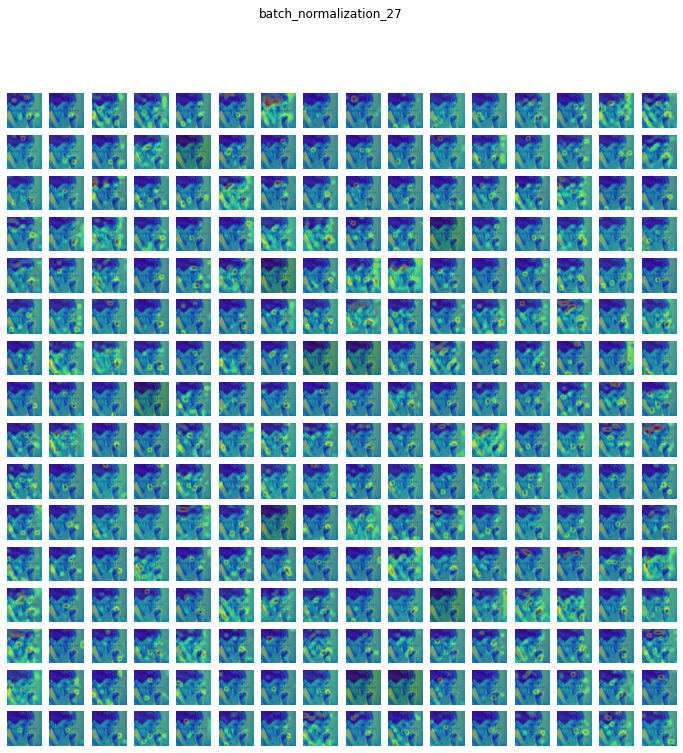

max_pooling2d_31 (1, 6, 6, 256) 


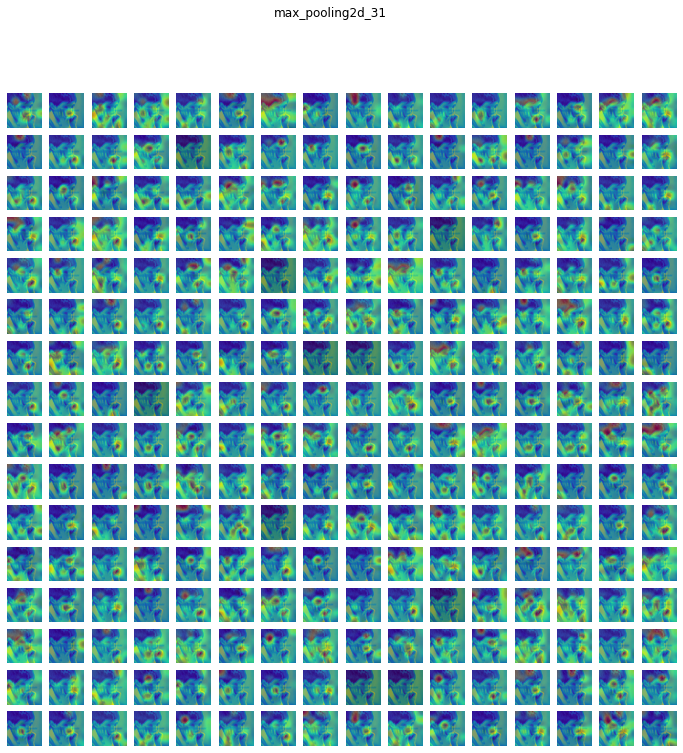

flatten_9 (1, 9216) -> Skipped. 2D Activations.
dense_26 (1, 250) -> Skipped. 2D Activations.
batch_normalization_28 (1, 250) -> Skipped. 2D Activations.
activation_25 (1, 250) -> Skipped. 2D Activations.
dropout_13 (1, 250) -> Skipped. 2D Activations.
dense_27 (1, 250) -> Skipped. 2D Activations.
batch_normalization_29 (1, 250) -> Skipped. 2D Activations.
activation_26 (1, 250) -> Skipped. 2D Activations.
dropout_14 (1, 250) -> Skipped. 2D Activations.
dense_28 (1, 250) -> Skipped. 2D Activations.
batch_normalization_30 (1, 250) -> Skipped. 2D Activations.
activation_27 (1, 250) -> Skipped. 2D Activations.
dropout_15 (1, 250) -> Skipped. 2D Activations.
dense_29 (1, 64) -> Skipped. 2D Activations.
activation_28 (1, 64) -> Skipped. 2D Activations.
dense_30 (1, 7) -> Skipped. 2D Activations.
activation_29 (1, 7) -> Skipped. 2D Activations.


In [45]:
keract.display_heatmaps(activations,X[3:4],fix=True)